In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from functions.Pre_processing_models import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler 
from sklearn.inspection import permutation_importance

from functions.Pre_processing_Casos_Graves import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection._search import GridSearchCV
from sklearn.model_selection._split import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectFdr

from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#### Lendo o dataset:

In [2]:
df = pd.read_csv(r'C:\Users\maril\OneDrive\Área de Trabalho\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

#### Utilizando a class de pré-processamento para preparar o dataset:

In [3]:
list_features = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
                'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS','SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE',
                'SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION','DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY','DISEASE_IMMUNOSUPPRESSION',
                'DISEASE_TABAGIST','DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao']

In [4]:
Pre_processing_models_df = Pre_processing_models(df)
Pre_processing_models_df.run_graves()

df = Pre_processing_models_df.df
df = df[list_features]
df['data_notificacao'] = pd.to_datetime(df['data_notificacao'])
df = df.sort_values(by='data_notificacao', ascending=True)
df = df.reset_index()
df = df.drop("index", axis=1)
df

C:\Users\maril\AppData\Local\Temp\ipykernel_45400\3432879523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_notificacao'] = pd.to_datetime(df['data_notificacao'])


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.356522,0,1,2020-02-26
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-26
2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.217391,1,0,2020-02-27
3,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-27
4,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.260870,1,0,2020-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2022-06-12
36431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.556522,0,1,2022-06-12
36432,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,1,0,2022-06-12
36433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2022-06-13


### Criação de uma função para configuração do modelo:

In [5]:
from sklearn.svm import SVC

def instantiate_SVC_model (X_train, y_train):
    param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'sigmoid']}
    

    # Init classifier
    svc_cl = SVC()

    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 1)

    # Init Grid Search
    grid_cv = GridSearchCV(svc_cl, param_grid, n_jobs = -1, cv=5, scoring = "roc_auc")

    # Fit 
    grid_cv.fit(X_train, y_train)

    mean_test_score = grid_cv.cv_results_['mean_test_score'].mean()
    std_test_score = grid_cv.cv_results_['std_test_score'].mean()
    best_score = grid_cv.best_score_
    best_params = grid_cv.best_params_

    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score']}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score']}")
    #print('')

    print('#'*40)
    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score'].mean()}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score'].mean()}")
    print('')
    print(f'best_score: {grid_cv.best_score_}')
    print(f'best_params_: {grid_cv.best_params_}')
    print('#'*40)
    print('')

    return mean_test_score, std_test_score, best_score, best_params

### Criação de uma função para aplicação do modelo:

In [6]:
def apply_model_svc(df):
    list_random_states = [42]

    mean_test_scores = []
    std_test_scores = []
    best_scores = []
    best_params = []

    #treino!
    data_inicio = df['data_notificacao'][0]
    data_fim = df['data_notificacao'][0]+pd.Timedelta(days=45)
    
    treino = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] <= data_fim )]
    X_train = treino.drop(labels=['death', 'data_notificacao'], axis=1)
    y_train = treino['death']

    #teste!
    teste = df[(df['data_notificacao'] > data_fim)]
    X_test = teste.drop(labels=['death', 'data_notificacao'], axis=1)
    y_test = teste['death']

    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X_train, y_train)


    for random_state in list_random_states:

        mean_test_score, std_test_score, best_score, best_param = instantiate_SVC_model(X_over, y_over)

        mean_test_scores.append(mean_test_score)
        std_test_scores.append(std_test_score)
        best_scores.append(best_score)
        best_params.append(best_param)

    return (X_over, y_over, X_test, y_test, mean_test_scores, std_test_scores, best_scores, best_params)

### Criação de uma função para imprimir as métricas do classificador final de cada modelo:

In [7]:
from sklearn.svm import SVC

def create_final_cl(X_over, y_over, X_test, y_test, C, gamma, kernel):

    # parametrizando o modelo final
    final_cl = SVC(C=C, gamma=gamma, kernel=kernel)
    #final_cl = make_pipeline(StandardScaler(), SVC(C=C, gamma=gamma, kernel=kernel))
    #treinando o modelo final
    final_cl.fit(X_over, y_over)
    preds = final_cl.predict(X_test)
    accuracy_score(y_test, preds)

    print('accuracy_score:', accuracy_score(y_test, preds))
    print('#'*40)

    print('"""Métricas f1_score:"""')
    print('f1: ', f1_score(y_test, preds))
    print('Macro: ', f1_score(y_test, preds, average='macro'))
    print('Micro: ', f1_score(y_test, preds, average='micro'))
    print('weighted: ', f1_score(y_test, preds, average='weighted'))
    print('#'*40)
    print('"""Métricas precision_score:"""')
    print('Precision: ', precision_score(y_test, preds))
    print('Macro: ', precision_score(y_test, preds, average='macro'))
    print('Micro: ', precision_score(y_test, preds, average='micro'))
    print('weighted: ', precision_score(y_test, preds, average='weighted'))

    return preds, final_cl

### Criação de funções para gerar a matriz de confusão e classification report:

In [16]:
feature_names = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS',
'SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE','SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION',
'DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY',
'DISEASE_IMMUNOSUPPRESSION','DISEASE_TABAGIST', 'DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao' ]
features = np.array(feature_names)

In [17]:
def plot_conf_matrix (X_test, y_test, preds, final_cl):

    confusion_matrix(y_test, preds)
    matrix = plot_confusion_matrix(final_cl, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(y_test, preds))


def plot_roc_curve(y_test, preds):
    
    print('roc_auc_score: ', roc_auc_score(y_test, preds, multi_class='ovr'))

    fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
    auc = metrics.roc_auc_score(y_test, preds)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

def plot_permutation_importance(final_cl, X_test, y_test):
    perm_importance = permutation_importance(final_cl, X_test, y_test)

    sorted_idx = perm_importance.importances_mean.argsort()
    plt.figure(figsize=(10,10))
    plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
    plt.xlabel("Permutation Importance")
    plt.show()

#### Criação de uma função para determinar os atributos mais importantes do modelo:

In [59]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

### Teste com o Período 1 (26/02/2020 até 25/05/2020):

In [9]:
#Periodo 1
data_inicio = df['data_notificacao'][0]
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=90)

df_1 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim)]
df_1

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.356522,0,1,2020-02-26
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-26
2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.217391,1,0,2020-02-27
3,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-27
4,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.260870,1,0,2020-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.400000,0,1,2020-05-25
10819,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.626087,0,1,2020-05-25
10820,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.704348,1,0,2020-05-25
10821,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0.782609,0,1,2020-05-25


In [10]:
X_train_oversampled_1, y_train_oversampled_1, X_test_1, y_test_1, mean_test_scores_1, std_test_scores_1, best_scores_1, best_params_1 = apply_model_svc(df_1)

########################################

best_score: 0.9101718293224001
best_params_: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [11]:
preds_1, final_cl_1 = create_final_cl(X_train_oversampled_1, y_train_oversampled_1, X_test_1, y_test_1, 10, 0.1, 'rbf')

accuracy_score: 0.7446635730858469
########################################
"""Métricas f1_score:"""
f1:  0.5965169569202566
Macro:  0.7048770614045492
Micro:  0.7446635730858469
weighted:  0.763431744314971
########################################
"""Métricas precision_score:"""
Precision:  0.4683362118595279
Macro:  0.6997724588252168
Micro:  0.7446635730858469
weighted:  0.824833948194843


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


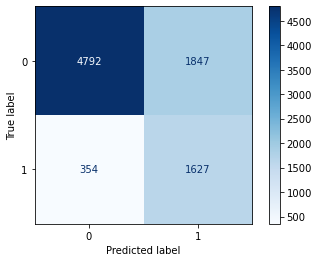

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      6639
           1       0.47      0.82      0.60      1981

    accuracy                           0.74      8620
   macro avg       0.70      0.77      0.70      8620
weighted avg       0.82      0.74      0.76      8620

roc_auc_score:  0.7715489118306393


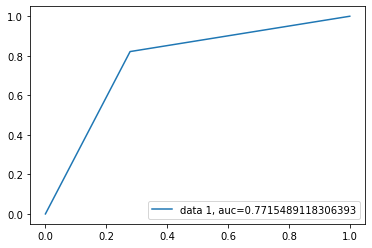

In [12]:
plot_conf_matrix (X_test_1, y_test_1, preds_1, final_cl_1)

plot_roc_curve(y_test_1, preds_1)

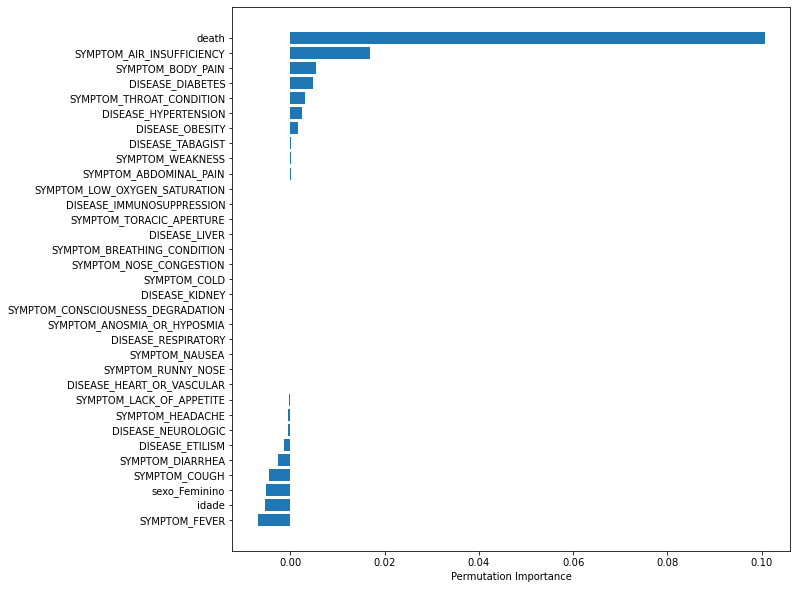

In [18]:
plot_permutation_importance(final_cl_1, X_test_1, y_test_1)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.00045
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.06396
Feature: 3, Score: 0.01280
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01883
Feature: 8, Score: 0.01340
Feature: 9, Score: 0.00385
Feature: 10, Score: 0.00868
Feature: 11, Score: 0.01987
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00677
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.00004
Feature: 16, Score: 0.00005
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00446
Feature: 21, Score: 0.00262
Feature: 22, Score: 0.00004
Feature: 23, Score: 0.00219
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00055
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00062
Feature: 30, Score: 0.23539
Feature: 31, Score: 0.00620
Feature: 32, Score: 0.00620


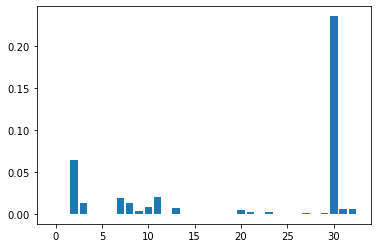

In [183]:
# perform permutation importance
results = permutation_importance(final_cl_1, X_train_oversampled_1, y_train_oversampled_1, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: -0.00226
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.04236
Feature: 3, Score: -0.00398
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00709
Feature: 8, Score: 0.00229
Feature: 9, Score: 0.00126
Feature: 10, Score: 0.00177
Feature: 11, Score: 0.00353
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00161
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00001
Feature: 18, Score: -0.00008
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00535
Feature: 21, Score: 0.00225
Feature: 22, Score: 0.00016
Feature: 23, Score: 0.00147
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00079
Feature: 28, Score: 0.00000
Feature: 29, Score: -0.00034
Feature: 30, Score: 0.20564
Feature: 31, Score: -0.00066
Feature: 32, Score: -0.00066


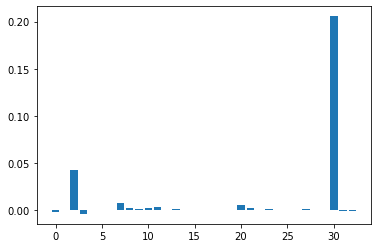

In [173]:
# perform permutation importance
results = permutation_importance(final_cl_1, X_train_oversampled_1, y_train_oversampled_1, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

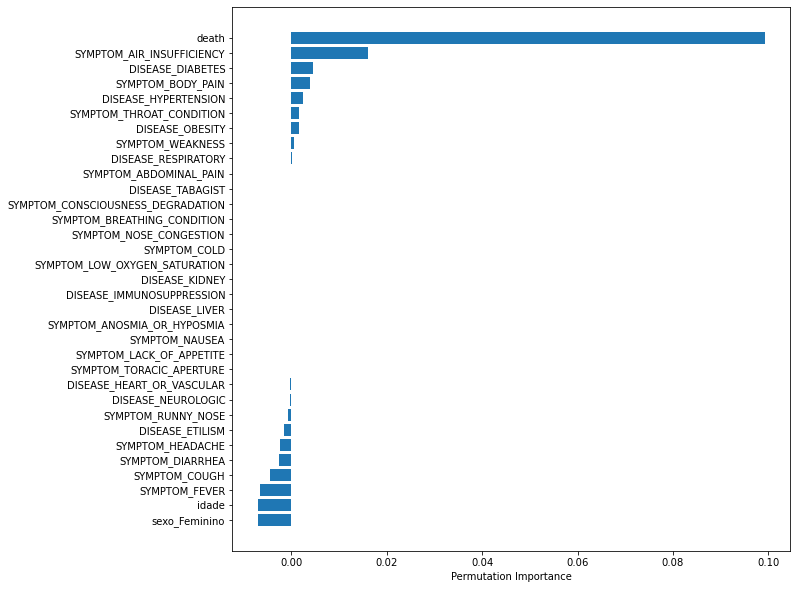

In [174]:
perm_importance = permutation_importance(final_cl_1, X_test_1, y_test_1)

feature_names = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS',
'SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE','SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION',
'DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY',
'DISEASE_IMMUNOSUPPRESSION','DISEASE_TABAGIST', 'DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 2 (27/03/2020 até 24/06/2020):

In [175]:
#Periodo 2
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=30)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=120)

df_2 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_2 = df_2.reset_index()
df_2 = df_2.drop("index", axis=1)
df_2

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.730435,1,0,2020-03-27
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.600000,0,1,2020-03-27
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.504348,0,1,2020-03-27
3,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.278261,1,0,2020-03-27
4,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.286957,1,0,2020-03-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12581,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.356522,1,0,2020-06-24
12582,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.095652,1,0,2020-06-24
12583,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.226087,1,0,2020-06-24
12584,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.313043,0,1,2020-06-24


In [176]:
X_train_oversampled_2, y_train_oversampled_2, X_test_2, y_test_2, mean_test_scores_2, std_test_scores_2, best_scores_2, best_params_2 = apply_model_svc(df_2)

########################################

best_score: 0.904170072881524
best_params_: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [177]:
preds_2, final_cl_2 = create_final_cl(X_train_oversampled_2, y_train_oversampled_2, X_test_2, y_test_2, 10, 0.1, 'rbf')

accuracy_score: 0.645763422818792
########################################
"""Métricas f1_score:"""
f1:  0.565698122910774
Macro:  0.633300628659212
Micro:  0.645763422818792
weighted:  0.6642094924452009
########################################
"""Métricas precision_score:"""
Precision:  0.4238921001926782
Macro:  0.6673073018220639
Micro:  0.645763422818792
weighted:  0.7786003260569759


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


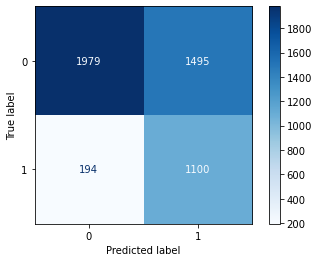

              precision    recall  f1-score   support

           0       0.91      0.57      0.70      3474
           1       0.42      0.85      0.57      1294

    accuracy                           0.65      4768
   macro avg       0.67      0.71      0.63      4768
weighted avg       0.78      0.65      0.66      4768

roc_auc_score:  0.7098688068308717


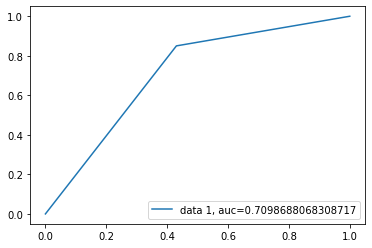

In [178]:
plot_conf_matrix (X_test_2, y_test_2, preds_2, final_cl_2)

plot_roc_curve(y_test_2, preds_2)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.00350
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.03996
Feature: 3, Score: 0.00525
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01235
Feature: 8, Score: 0.00913
Feature: 9, Score: 0.00348
Feature: 10, Score: 0.00106
Feature: 11, Score: 0.00197
Feature: 12, Score: -0.00001
Feature: 13, Score: 0.00160
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.00003
Feature: 16, Score: 0.00005
Feature: 17, Score: 0.00025
Feature: 18, Score: 0.00043
Feature: 19, Score: -0.00002
Feature: 20, Score: 0.02125
Feature: 21, Score: 0.00306
Feature: 22, Score: 0.00109
Feature: 23, Score: 0.00672
Feature: 24, Score: 0.00039
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00018
Feature: 27, Score: 0.00224
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00207
Feature: 30, Score: 0.18530
Feature: 31, Score: 0.00302
Feature: 32, Score: 0.00301


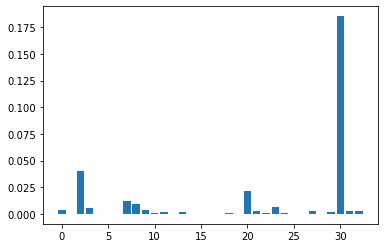

In [184]:
# perform permutation importance
results = permutation_importance(final_cl_2, X_train_oversampled_2, y_train_oversampled_2, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00490
Feature: 1, Score: 0.00002
Feature: 2, Score: 0.03458
Feature: 3, Score: -0.00197
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00485
Feature: 8, Score: 0.00184
Feature: 9, Score: 0.00253
Feature: 10, Score: -0.00000
Feature: 11, Score: 0.00043
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00113
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.00011
Feature: 16, Score: -0.00006
Feature: 17, Score: -0.00004
Feature: 18, Score: 0.00027
Feature: 19, Score: 0.00062
Feature: 20, Score: 0.03291
Feature: 21, Score: 0.00677
Feature: 22, Score: 0.00154
Feature: 23, Score: 0.00920
Feature: 24, Score: 0.00022
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00149
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00383
Feature: 30, Score: 0.17929
Feature: 31, Score: 0.00024
Feature: 32, Score: 0.00024


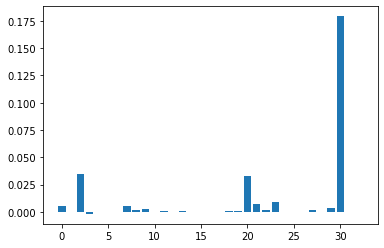

In [179]:
# perform permutation importance
results = permutation_importance(final_cl_2, X_train_oversampled_2, y_train_oversampled_2, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

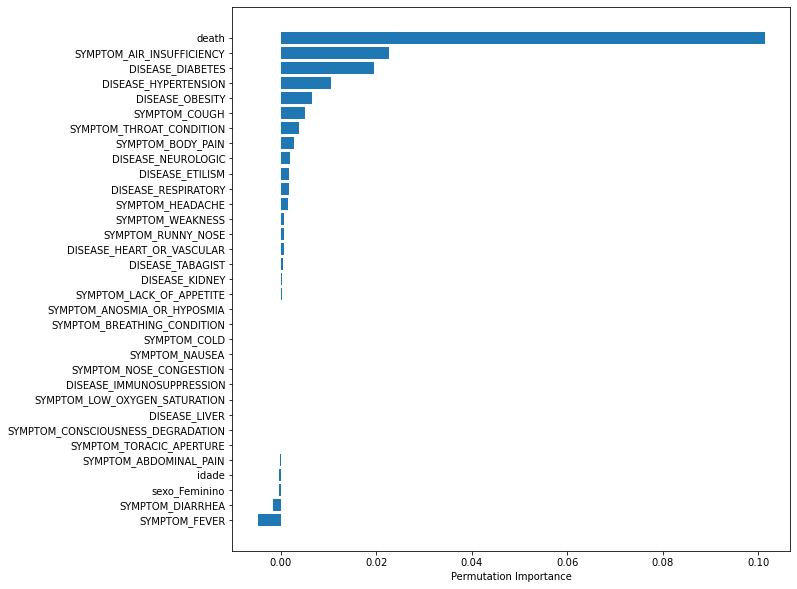

In [180]:
perm_importance = permutation_importance(final_cl_2, X_test_2, y_test_2)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 3 (26/04/2020 até 24/07/2020):

In [186]:
#Periodo 3
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=60)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=150)

df_3 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_3 = df_3.reset_index()
df_3 = df_3.drop("index", axis=1)
df_3

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.652174,0,1,2020-04-26
1,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.443478,0,1,2020-04-26
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.782609,1,0,2020-04-26
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.747826,1,0,2020-04-26
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.452174,1,0,2020-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.026087,0,1,2020-07-24
9581,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.834783,1,0,2020-07-24
9582,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.486957,0,1,2020-07-24
9583,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0.339130,1,0,2020-07-24


In [187]:
X_train_oversampled_3, y_train_oversampled_3, X_test_3, y_test_3, mean_test_scores_3, std_test_scores_3, best_scores_3, best_params_3 = apply_model_svc(df_3)

########################################

best_score: 0.8353337579525455
best_params_: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [188]:
preds_3, final_cl_3 = create_final_cl(X_train_oversampled_3, y_train_oversampled_3, X_test_3, y_test_3, 100, 0.1, 'rbf')

accuracy_score: 0.6496173983084977
########################################
"""Métricas f1_score:"""
f1:  0.47716346153846156
Macro:  0.606843390369473
Micro:  0.6496173983084977
weighted:  0.6811625763245794
########################################
"""Métricas precision_score:"""
Precision:  0.35008818342151676
Macro:  0.625748317062871
Micro:  0.6496173983084977
weighted:  0.7837283292141587


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


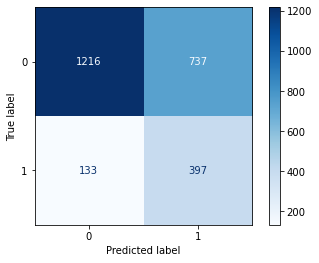

              precision    recall  f1-score   support

           0       0.90      0.62      0.74      1953
           1       0.35      0.75      0.48       530

    accuracy                           0.65      2483
   macro avg       0.63      0.69      0.61      2483
weighted avg       0.78      0.65      0.68      2483

roc_auc_score:  0.6858442261059423


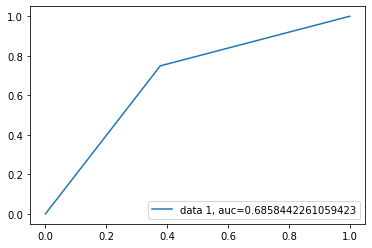

In [189]:
plot_conf_matrix (X_test_3, y_test_3, preds_3, final_cl_3)

plot_roc_curve(y_test_3, preds_3)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.01685
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03836
Feature: 3, Score: 0.01415
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00057
Feature: 6, Score: 0.00076
Feature: 7, Score: 0.01246
Feature: 8, Score: 0.01723
Feature: 9, Score: 0.01705
Feature: 10, Score: 0.00845
Feature: 11, Score: 0.00747
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00429
Feature: 14, Score: 0.00085
Feature: 15, Score: 0.00051
Feature: 16, Score: 0.00087
Feature: 17, Score: 0.00242
Feature: 18, Score: 0.00105
Feature: 19, Score: 0.00145
Feature: 20, Score: 0.02758
Feature: 21, Score: 0.00864
Feature: 22, Score: 0.00210
Feature: 23, Score: 0.00507
Feature: 24, Score: -0.00005
Feature: 25, Score: 0.00065
Feature: 26, Score: 0.00130
Feature: 27, Score: 0.00306
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00375
Feature: 30, Score: 0.12482
Feature: 31, Score: 0.00594
Feature: 32, Score: 0.00594


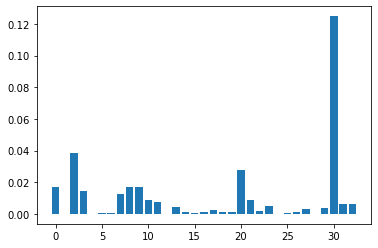

In [190]:
# perform permutation importance
results = permutation_importance(final_cl_3, X_train_oversampled_3, y_train_oversampled_3, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.01544
Feature: 1, Score: 0.00005
Feature: 2, Score: 0.03346
Feature: 3, Score: 0.00602
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00077
Feature: 6, Score: 0.00066
Feature: 7, Score: 0.00654
Feature: 8, Score: 0.00624
Feature: 9, Score: 0.01097
Feature: 10, Score: 0.00501
Feature: 11, Score: 0.00283
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00271
Feature: 14, Score: 0.00066
Feature: 15, Score: 0.00047
Feature: 16, Score: 0.00020
Feature: 17, Score: 0.00132
Feature: 18, Score: 0.00056
Feature: 19, Score: 0.00174
Feature: 20, Score: 0.03636
Feature: 21, Score: 0.01509
Feature: 22, Score: 0.00268
Feature: 23, Score: 0.00525
Feature: 24, Score: 0.00005
Feature: 25, Score: 0.00039
Feature: 26, Score: 0.00110
Feature: 27, Score: 0.00215
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00496
Feature: 30, Score: 0.11274
Feature: 31, Score: 0.00108
Feature: 32, Score: 0.00108


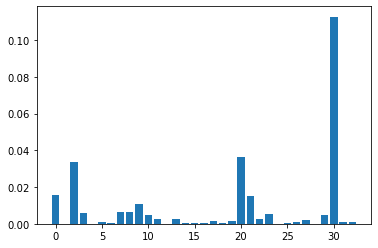

In [191]:
# perform permutation importance
results = permutation_importance(final_cl_3, X_train_oversampled_3, y_train_oversampled_3, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

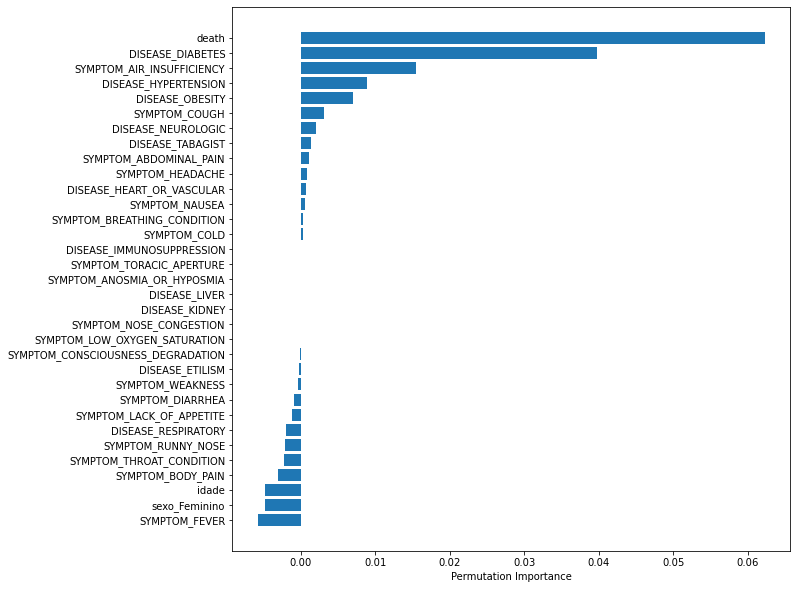

In [192]:
perm_importance = permutation_importance(final_cl_3, X_test_3, y_test_3)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 4 (26/05/2020 até 23/08/2020):

In [159]:
#Periodo 4
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=90)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=180)

df_4 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_4 = df_4.reset_index()
df_4 = df_4.drop("index", axis=1)
df_4

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.347826,0,1,2020-05-26
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.695652,0,1,2020-05-26
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0.565217,1,0,2020-05-26
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.200000,1,0,2020-05-26
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.426087,0,1,2020-05-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2020-08-23
5302,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.417391,0,1,2020-08-23
5303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.521739,1,0,2020-08-23
5304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.095652,0,1,2020-08-23


In [160]:
X_train_oversampled_4, y_train_oversampled_4, X_test_4, y_test_4, mean_test_scores_4, std_test_scores_4, best_scores_4, best_params_4 = apply_model_svc(df_4)

########################################

best_score: 0.8094442872429347
best_params_: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [161]:
preds_4, final_cl_4 = create_final_cl(X_train_oversampled_4, y_train_oversampled_4, X_test_4, y_test_4, 10, 1, 'rbf')

accuracy_score: 0.7019551740581783
########################################
"""Métricas f1_score:"""
f1:  0.42817932296431843
Macro:  0.6133157175930911
Micro:  0.7019551740581783
weighted:  0.7285293537354603
########################################
"""Métricas precision_score:"""
Precision:  0.3357245337159254
Macro:  0.6100051240008199
Micro:  0.7019551740581783
weighted:  0.7806947617317627


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


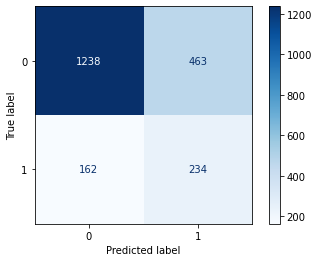

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1701
           1       0.34      0.59      0.43       396

    accuracy                           0.70      2097
   macro avg       0.61      0.66      0.61      2097
weighted avg       0.78      0.70      0.73      2097

roc_auc_score:  0.6593581315803537


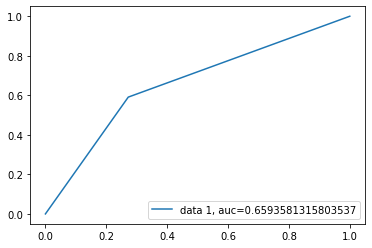

In [162]:
plot_conf_matrix (X_test_4, y_test_4, preds_4, final_cl_4)

plot_roc_curve(y_test_4, preds_4)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.06542
Feature: 1, Score: 0.00005
Feature: 2, Score: 0.08484
Feature: 3, Score: 0.07644
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00642
Feature: 6, Score: 0.00172
Feature: 7, Score: 0.03538
Feature: 8, Score: 0.03801
Feature: 9, Score: 0.04454
Feature: 10, Score: 0.03943
Feature: 11, Score: 0.01332
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01588
Feature: 14, Score: 0.00125
Feature: 15, Score: 0.00271
Feature: 16, Score: 0.00262
Feature: 17, Score: 0.00703
Feature: 18, Score: 0.00132
Feature: 19, Score: 0.00307
Feature: 20, Score: 0.06943
Feature: 21, Score: 0.03853
Feature: 22, Score: 0.00729
Feature: 23, Score: 0.02080
Feature: 24, Score: 0.00037
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00918
Feature: 27, Score: 0.00732
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00643
Feature: 30, Score: 0.10420
Feature: 31, Score: 0.04287
Feature: 32, Score: 0.04287


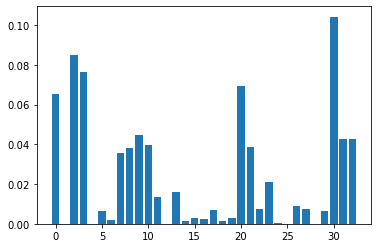

In [193]:
# perform permutation importance
results = permutation_importance(final_cl_4, X_train_oversampled_4, y_train_oversampled_4, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.03661
Feature: 1, Score: -0.00021
Feature: 2, Score: 0.05597
Feature: 3, Score: 0.04611
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00401
Feature: 6, Score: 0.00152
Feature: 7, Score: 0.02511
Feature: 8, Score: 0.01855
Feature: 9, Score: 0.02437
Feature: 10, Score: 0.01811
Feature: 11, Score: 0.00875
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00644
Feature: 14, Score: 0.00154
Feature: 15, Score: 0.00100
Feature: 16, Score: 0.00132
Feature: 17, Score: 0.00465
Feature: 18, Score: 0.00037
Feature: 19, Score: 0.00263
Feature: 20, Score: 0.06204
Feature: 21, Score: 0.02594
Feature: 22, Score: 0.00401
Feature: 23, Score: 0.01108
Feature: 24, Score: 0.00021
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00580
Feature: 27, Score: 0.00327
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00467
Feature: 30, Score: 0.09698
Feature: 31, Score: 0.00321
Feature: 32, Score: 0.00321


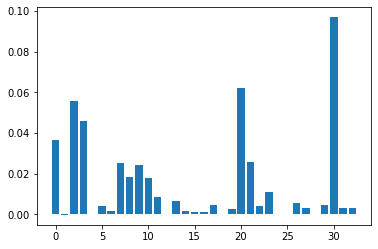

In [163]:
# perform permutation importance
results = permutation_importance(final_cl_4, X_train_oversampled_4, y_train_oversampled_4, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

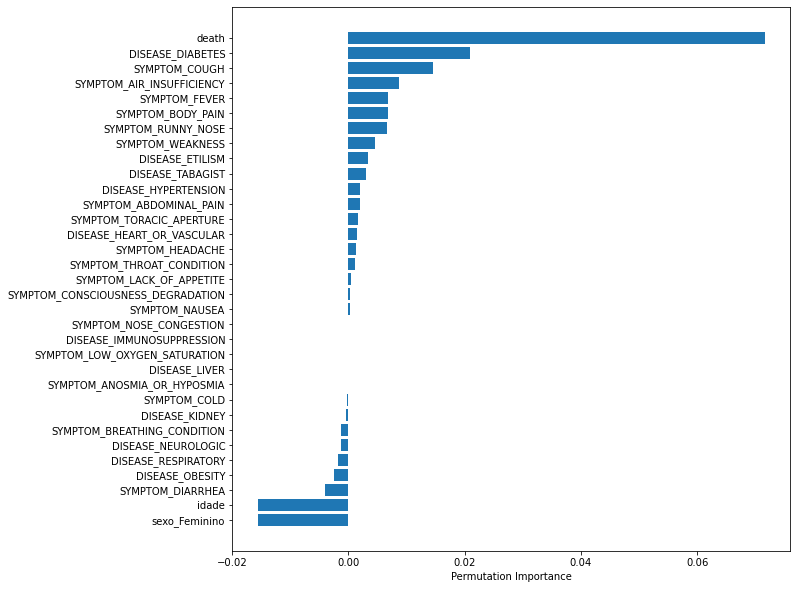

In [164]:
perm_importance = permutation_importance(final_cl_4, X_test_4, y_test_4)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 5 (25/06/2020 até 22/09/2020):

In [153]:
#Periodo 5
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=120)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=210)

df_5 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_5 = df_5.reset_index()
df_5 = df_5.drop("index", axis=1)
df_5

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.330435,1,0,2020-06-25
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.026087,0,1,2020-06-25
2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.547826,1,0,2020-06-25
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.008696,1,0,2020-06-25
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.304348,1,0,2020-06-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0.478261,0,1,2020-09-22
3795,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.660870,0,1,2020-09-22
3796,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.208696,0,1,2020-09-22
3797,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,0,1,2020-09-22


In [154]:
X_train_oversampled_5, y_train_oversampled_5, X_test_5, y_test_5, mean_test_scores_5, std_test_scores_5, best_scores_5, best_params_5 = apply_model_svc(df_5)

########################################

best_score: 0.8697020972241102
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [155]:
preds_5, final_cl_5 = create_final_cl(X_train_oversampled_5, y_train_oversampled_5, X_test_5, y_test_5, 100, 1, 'rbf')

accuracy_score: 0.6690042075736325
########################################
"""Métricas f1_score:"""
f1:  0.38860103626943004
Macro:  0.5808389796731765
Micro:  0.6690042075736325
weighted:  0.7016280380811407
########################################
"""Métricas precision_score:"""
Precision:  0.2958579881656805
Macro:  0.585360985377726
Micro:  0.6690042075736325
weighted:  0.7672646919008627


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


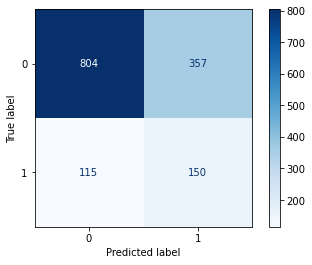

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1161
           1       0.30      0.57      0.39       265

    accuracy                           0.67      1426
   macro avg       0.59      0.63      0.58      1426
weighted avg       0.77      0.67      0.70      1426

roc_auc_score:  0.6292720978986884


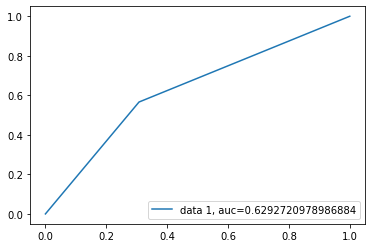

In [156]:
plot_conf_matrix (X_test_5, y_test_5, preds_5, final_cl_5)

plot_roc_curve(y_test_5, preds_5)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.07716
Feature: 1, Score: 0.00240
Feature: 2, Score: 0.13018
Feature: 3, Score: 0.11130
Feature: 4, Score: 0.00052
Feature: 5, Score: 0.01049
Feature: 6, Score: 0.00201
Feature: 7, Score: 0.03835
Feature: 8, Score: 0.04407
Feature: 9, Score: 0.05622
Feature: 10, Score: 0.03935
Feature: 11, Score: 0.03351
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02017
Feature: 14, Score: 0.00371
Feature: 15, Score: 0.00082
Feature: 16, Score: 0.00509
Feature: 17, Score: 0.01418
Feature: 18, Score: 0.00462
Feature: 19, Score: 0.00624
Feature: 20, Score: 0.10390
Feature: 21, Score: 0.04329
Feature: 22, Score: 0.01579
Feature: 23, Score: 0.03314
Feature: 24, Score: 0.00187
Feature: 25, Score: 0.00049
Feature: 26, Score: 0.02535
Feature: 27, Score: 0.01069
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01284
Feature: 30, Score: 0.16151
Feature: 31, Score: 0.08928
Feature: 32, Score: 0.08928


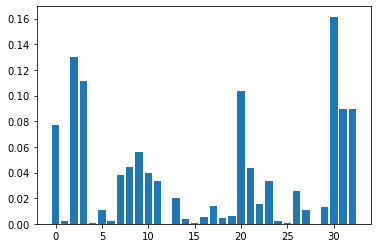

In [194]:
# perform permutation importance
results = permutation_importance(final_cl_5, X_train_oversampled_5, y_train_oversampled_5, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.05353
Feature: 1, Score: 0.00092
Feature: 2, Score: 0.08837
Feature: 3, Score: 0.05722
Feature: 4, Score: 0.00011
Feature: 5, Score: 0.00301
Feature: 6, Score: 0.00206
Feature: 7, Score: 0.01654
Feature: 8, Score: 0.01595
Feature: 9, Score: 0.02929
Feature: 10, Score: 0.01728
Feature: 11, Score: 0.01158
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01036
Feature: 14, Score: 0.00175
Feature: 15, Score: 0.00041
Feature: 16, Score: 0.00138
Feature: 17, Score: 0.00549
Feature: 18, Score: 0.00195
Feature: 19, Score: 0.00276
Feature: 20, Score: 0.06069
Feature: 21, Score: 0.02389
Feature: 22, Score: 0.00824
Feature: 23, Score: 0.01618
Feature: 24, Score: 0.00054
Feature: 25, Score: 0.00005
Feature: 26, Score: 0.01278
Feature: 27, Score: 0.00386
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00733
Feature: 30, Score: 0.12017
Feature: 31, Score: 0.01357
Feature: 32, Score: 0.01357


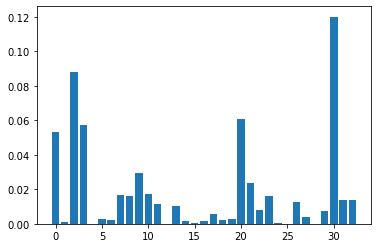

In [157]:
# perform permutation importance
results = permutation_importance(final_cl_5, X_train_oversampled_5, y_train_oversampled_5, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

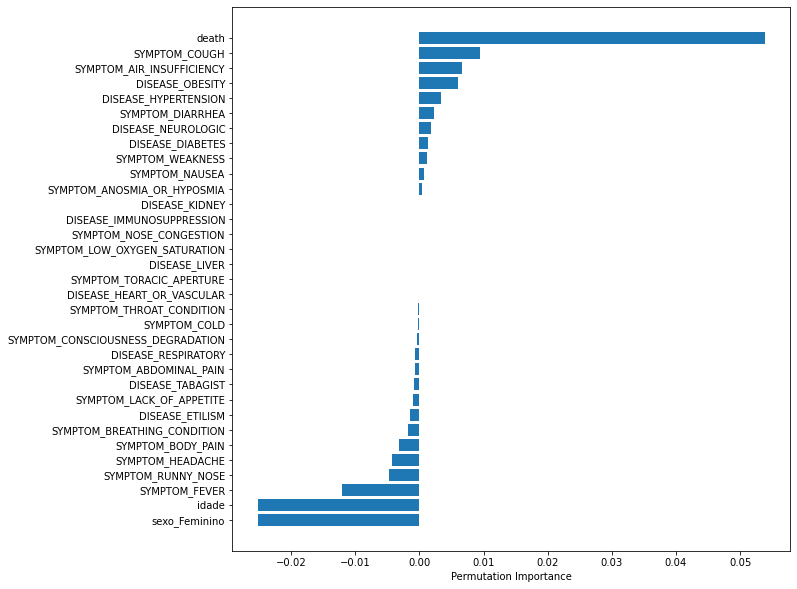

In [158]:
perm_importance = permutation_importance(final_cl_5, X_test_5, y_test_5)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 6 (25/07/2020 até 22/10/2020):

In [147]:
#Periodo 6
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=150)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=240)

df_6 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_6 = df_6.reset_index()
df_6 = df_6.drop("index", axis=1)
df_6

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.591304,0,1,2020-07-25
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.539130,1,0,2020-07-25
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.373913,1,0,2020-07-25
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.478261,1,0,2020-07-25
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.660870,1,0,2020-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.495652,1,0,2020-10-22
2782,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.747826,1,0,2020-10-22
2783,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.434783,0,1,2020-10-22
2784,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.608696,1,0,2020-10-22


In [148]:
X_train_oversampled_6, y_train_oversampled_6, X_test_6, y_test_6, mean_test_scores_6, std_test_scores_6, best_scores_6, best_params_6 = apply_model_svc(df_6)

########################################

best_score: 0.8833598918585469
best_params_: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [149]:
preds_6, final_cl_6 = create_final_cl(X_train_oversampled_6, y_train_oversampled_6, X_test_6, y_test_6, 10, 1, 'rbf')

accuracy_score: 0.6298174442190669
########################################
"""Métricas f1_score:"""
f1:  0.4065040650406504
Macro:  0.568764191694975
Micro:  0.6298174442190669
weighted:  0.6543374836424892
########################################
"""Métricas precision_score:"""
Precision:  0.32722513089005234
Macro:  0.5742085919350923
Micro:  0.6298174442190669
weighted:  0.7044635612489066


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


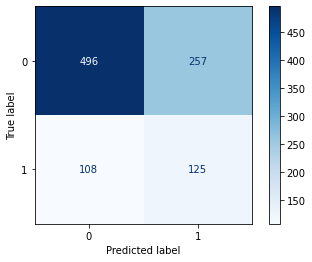

              precision    recall  f1-score   support

           0       0.82      0.66      0.73       753
           1       0.33      0.54      0.41       233

    accuracy                           0.63       986
   macro avg       0.57      0.60      0.57       986
weighted avg       0.70      0.63      0.65       986

roc_auc_score:  0.5975896129359529


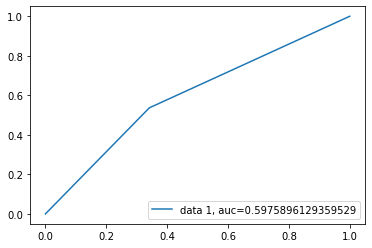

In [150]:
plot_conf_matrix (X_test_6, y_test_6, preds_6, final_cl_6)

plot_roc_curve(y_test_6, preds_6)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.09234
Feature: 1, Score: 0.00172
Feature: 2, Score: 0.11472
Feature: 3, Score: 0.09776
Feature: 4, Score: 0.00040
Feature: 5, Score: 0.00978
Feature: 6, Score: 0.00413
Feature: 7, Score: 0.03035
Feature: 8, Score: 0.03980
Feature: 9, Score: 0.03639
Feature: 10, Score: 0.02876
Feature: 11, Score: 0.04374
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02182
Feature: 14, Score: 0.00327
Feature: 15, Score: 0.00039
Feature: 16, Score: 0.00613
Feature: 17, Score: 0.01067
Feature: 18, Score: 0.00536
Feature: 19, Score: 0.00362
Feature: 20, Score: 0.08093
Feature: 21, Score: 0.04717
Feature: 22, Score: 0.01411
Feature: 23, Score: 0.03781
Feature: 24, Score: 0.00016
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02344
Feature: 27, Score: 0.01089
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00448
Feature: 30, Score: 0.11606
Feature: 31, Score: 0.08219
Feature: 32, Score: 0.08219


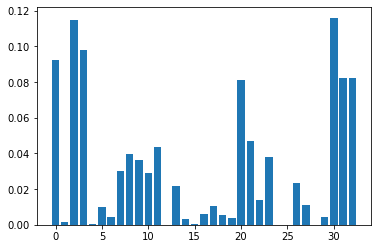

In [195]:
# perform permutation importance
results = permutation_importance(final_cl_6, X_train_oversampled_6, y_train_oversampled_6, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.04965
Feature: 1, Score: 0.00019
Feature: 2, Score: 0.05461
Feature: 3, Score: 0.04277
Feature: 4, Score: 0.00016
Feature: 5, Score: 0.00416
Feature: 6, Score: 0.00228
Feature: 7, Score: 0.01048
Feature: 8, Score: 0.01322
Feature: 9, Score: 0.01212
Feature: 10, Score: 0.01333
Feature: 11, Score: 0.01523
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00867
Feature: 14, Score: 0.00122
Feature: 15, Score: 0.00048
Feature: 16, Score: 0.00162
Feature: 17, Score: 0.00535
Feature: 18, Score: 0.00151
Feature: 19, Score: 0.00122
Feature: 20, Score: 0.05266
Feature: 21, Score: 0.02535
Feature: 22, Score: 0.00732
Feature: 23, Score: 0.01461
Feature: 24, Score: 0.00004
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01149
Feature: 27, Score: 0.00440
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00221
Feature: 30, Score: 0.09666
Feature: 31, Score: 0.00922
Feature: 32, Score: 0.00922


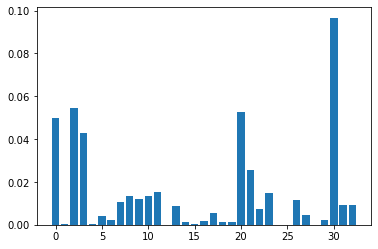

In [151]:
# perform permutation importance
results = permutation_importance(final_cl_6, X_train_oversampled_6, y_train_oversampled_6, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

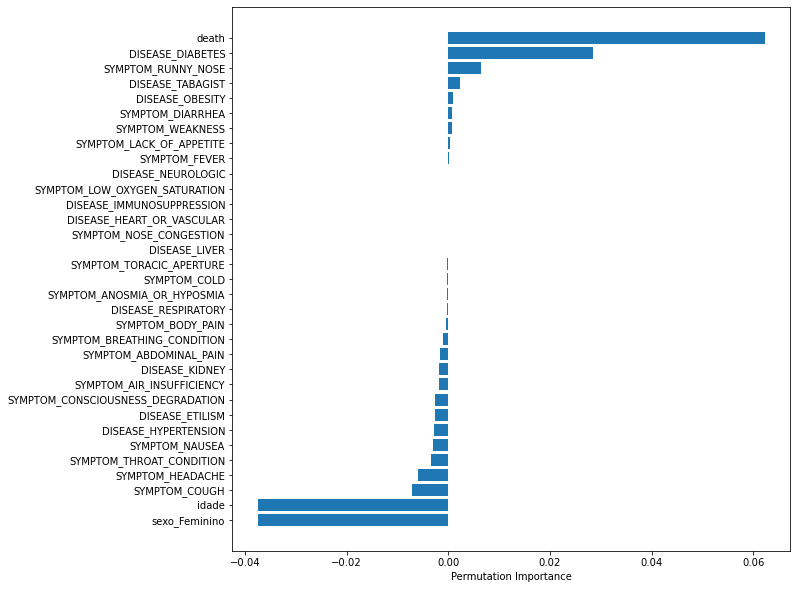

In [152]:
perm_importance = permutation_importance(final_cl_6, X_test_6, y_test_6)

feature_names = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS',
'SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE','SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION',
'DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY',
'DISEASE_IMMUNOSUPPRESSION','DISEASE_TABAGIST', 'DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")


In [67]:
"""feature_names = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS',
'SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE','SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION',
'DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY',
'DISEASE_IMMUNOSUPPRESSION','DISEASE_TABAGIST', 'DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao' ]

f_importances(abs(final_cl_6.coef_[0]), feature_names, top=10)"""

'feature_names = ["SYMPTOM_COUGH",\'SYMPTOM_COLD\',\'SYMPTOM_AIR_INSUFFICIENCY\',\'SYMPTOM_FEVER\',\'SYMPTOM_LOW_OXYGEN_SATURATION\',\'SYMPTOM_BREATHING_CONDITION\',\'SYMPTOM_TORACIC_APERTURE\',\'SYMPTOM_THROAT_CONDITION\',\n\'SYMPTOM_HEADACHE\',\'SYMPTOM_BODY_PAIN\',\'SYMPTOM_DIARRHEA\',\'SYMPTOM_RUNNY_NOSE\',\'SYMPTOM_NOSE_CONGESTION\',\'SYMPTOM_WEAKNESS\',\n\'SYMPTOM_ANOSMIA_OR_HYPOSMIA\',\'SYMPTOM_NAUSEA\',\'SYMPTOM_LACK_OF_APPETITE\',\'SYMPTOM_ABDOMINAL_PAIN\',\'SYMPTOM_CONSCIOUSNESS_DEGRADATION\',\n\'DISEASE_HEART_OR_VASCULAR\',\'DISEASE_DIABETES\',\'DISEASE_HYPERTENSION\',\'DISEASE_RESPIRATORY\',\'DISEASE_OBESITY\',\'DISEASE_KIDNEY\',\n\'DISEASE_IMMUNOSUPPRESSION\',\'DISEASE_TABAGIST\', \'DISEASE_ETILISM\',\'DISEASE_LIVER\',\'DISEASE_NEUROLOGIC\',\'death\', \'idade\', \'sexo_Feminino\',\'sexo_Masculino\', \'data_notificacao\' ]\n\nf_importances(abs(final_cl_6.coef_[0]), feature_names, top=10)'

### Teste com o Período 7 (24/08/2020 até 21/11/2020):

In [141]:
#Periodo 7
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=180)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=270)

df_7 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_7 = df_7.reset_index()
df_7 = df_7.drop("index", axis=1)
df_7

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.304348,0,1,2020-08-24
1,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0.217391,1,0,2020-08-24
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.678261,1,0,2020-08-24
3,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.017391,1,0,2020-08-24
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.678261,0,1,2020-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.486957,0,1,2020-11-21
2289,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.373913,1,0,2020-11-21
2290,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.313043,0,1,2020-11-21
2291,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.739130,0,1,2020-11-21


In [142]:
X_train_oversampled_7, y_train_oversampled_7, X_test_7, y_test_7, mean_test_scores_7, std_test_scores_7, best_scores_7, best_params_7 = apply_model_svc(df_7)

########################################

best_score: 0.8652312813766813
best_params_: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [143]:
preds_7, final_cl_7 = create_final_cl(X_train_oversampled_7, y_train_oversampled_7, X_test_7, y_test_7, 1, 1, 'rbf')

accuracy_score: 0.6722689075630253
########################################
"""Métricas f1_score:"""
f1:  0.40407470288624786
Macro:  0.5890302683780885
Micro:  0.6722689075630253
weighted:  0.6669153851258197
########################################
"""Métricas precision_score:"""
Precision:  0.4265232974910394
Macro:  0.5926808406647116
Micro:  0.6722689075630253
weighted:  0.6626500768657632


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


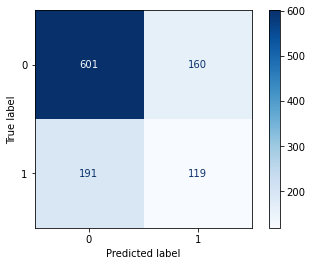

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       761
           1       0.43      0.38      0.40       310

    accuracy                           0.67      1071
   macro avg       0.59      0.59      0.59      1071
weighted avg       0.66      0.67      0.67      1071

roc_auc_score:  0.5868106481285236


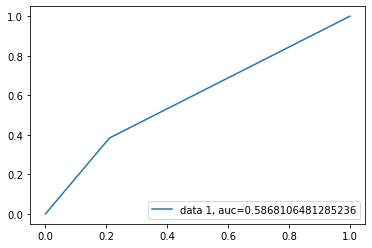

In [144]:
plot_conf_matrix (X_test_7, y_test_7, preds_7, final_cl_7)

plot_roc_curve(y_test_7, preds_7)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.09248
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.06108
Feature: 3, Score: 0.09251
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00951
Feature: 6, Score: 0.00403
Feature: 7, Score: 0.02441
Feature: 8, Score: 0.02178
Feature: 9, Score: 0.03317
Feature: 10, Score: 0.03940
Feature: 11, Score: 0.03457
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.03622
Feature: 14, Score: 0.00014
Feature: 15, Score: 0.00043
Feature: 16, Score: 0.00253
Feature: 17, Score: 0.00808
Feature: 18, Score: 0.00610
Feature: 19, Score: 0.00153
Feature: 20, Score: 0.09386
Feature: 21, Score: 0.01132
Feature: 22, Score: 0.01368
Feature: 23, Score: 0.03245
Feature: 24, Score: -0.00008
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.03214
Feature: 27, Score: 0.00804
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01409
Feature: 30, Score: 0.11020
Feature: 31, Score: 0.05598
Feature: 32, Score: 0.05598


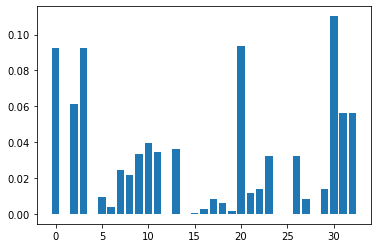

In [196]:
# perform permutation importance
results = permutation_importance(final_cl_7, X_train_oversampled_7, y_train_oversampled_7, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.04722
Feature: 1, Score: -0.00015
Feature: 2, Score: 0.02672
Feature: 3, Score: 0.04130
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00500
Feature: 6, Score: 0.00184
Feature: 7, Score: 0.01044
Feature: 8, Score: 0.00561
Feature: 9, Score: 0.01306
Feature: 10, Score: 0.01512
Feature: 11, Score: 0.01086
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01098
Feature: 14, Score: -0.00035
Feature: 15, Score: -0.00017
Feature: 16, Score: -0.00001
Feature: 17, Score: 0.00379
Feature: 18, Score: 0.00174
Feature: 19, Score: 0.00090
Feature: 20, Score: 0.05520
Feature: 21, Score: 0.00643
Feature: 22, Score: 0.00524
Feature: 23, Score: 0.01275
Feature: 24, Score: -0.00015
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02014
Feature: 27, Score: 0.00477
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00811
Feature: 30, Score: 0.09322
Feature: 31, Score: 0.00498
Feature: 32, Score: 0.00498


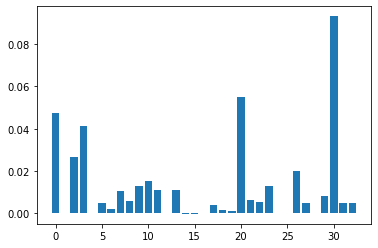

In [145]:
# perform permutation importance
results = permutation_importance(final_cl_7, X_train_oversampled_7, y_train_oversampled_7, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


Text(0.5, 0, 'Permutation Importance')

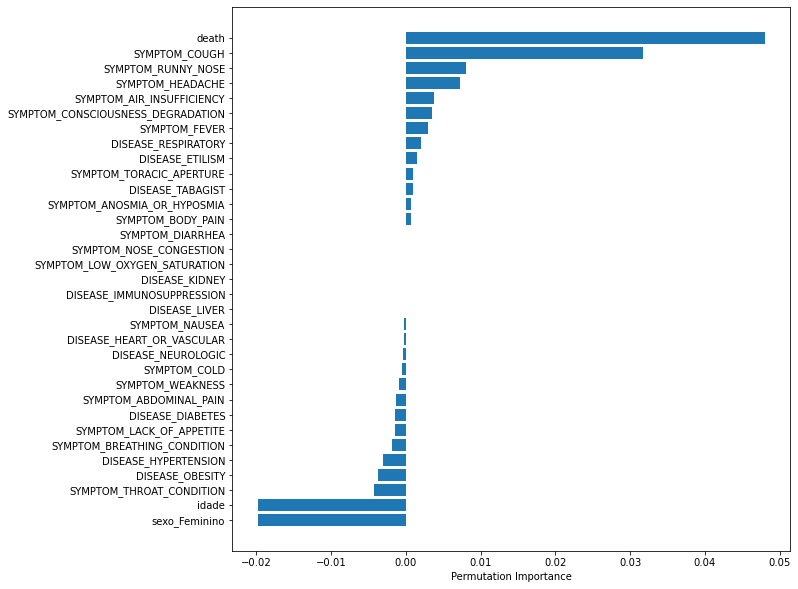

In [146]:
perm_importance = permutation_importance(final_cl_7, X_test_7, y_test_7)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 8 (23/09/2020 até 21/12/2020):

In [135]:
#Periodo 8
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=210)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=300)

df_8 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_8 = df_8.reset_index()
df_8 = df_8.drop("index", axis=1)
df_8

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2020-09-23
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.052174,0,1,2020-09-23
2,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0.339130,0,1,2020-09-23
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.539130,1,0,2020-09-23
4,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0.486957,0,1,2020-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0.591304,0,1,2020-12-21
2357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.573913,0,1,2020-12-21
2358,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.739130,1,0,2020-12-21
2359,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0.504348,0,1,2020-12-21


In [136]:
X_train_oversampled_8, y_train_oversampled_8, X_test_8, y_test_8, mean_test_scores_8, std_test_scores_8, best_scores_8, best_params_8 = apply_model_svc(df_8)

########################################

best_score: 0.85458635277567
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [137]:
preds_8, final_cl_8 = create_final_cl(X_train_oversampled_8, y_train_oversampled_8, X_test_8, y_test_8, 100, 1, 'rbf')

accuracy_score: 0.6786551993745114
########################################
"""Métricas f1_score:"""
f1:  0.471042471042471
Macro:  0.6201366201366201
Micro:  0.6786551993745114
weighted:  0.6706118090011757
########################################
"""Métricas precision_score:"""
Precision:  0.5169491525423728
Macro:  0.6287448465414567
Micro:  0.6786551993745114
weighted:  0.6665928023675733


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


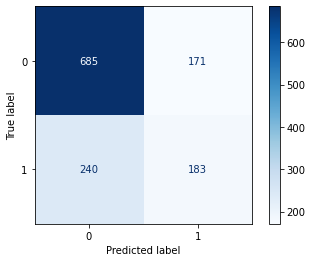

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       856
           1       0.52      0.43      0.47       423

    accuracy                           0.68      1279
   macro avg       0.63      0.62      0.62      1279
weighted avg       0.67      0.68      0.67      1279

roc_auc_score:  0.6164288791674952


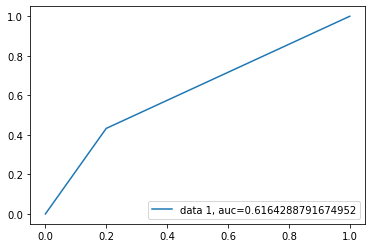

In [138]:
plot_conf_matrix (X_test_8, y_test_8, preds_8, final_cl_8)

plot_roc_curve(y_test_8, preds_8)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.11029
Feature: 1, Score: 0.00071
Feature: 2, Score: 0.06489
Feature: 3, Score: 0.11803
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00857
Feature: 6, Score: 0.00256
Feature: 7, Score: 0.03662
Feature: 8, Score: 0.04413
Feature: 9, Score: 0.05158
Feature: 10, Score: 0.04304
Feature: 11, Score: 0.03063
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02764
Feature: 14, Score: 0.00170
Feature: 15, Score: 0.00259
Feature: 16, Score: 0.00405
Feature: 17, Score: 0.01333
Feature: 18, Score: 0.00409
Feature: 19, Score: 0.00014
Feature: 20, Score: 0.08135
Feature: 21, Score: 0.02759
Feature: 22, Score: 0.01515
Feature: 23, Score: 0.02040
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.03344
Feature: 27, Score: 0.00863
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.02144
Feature: 30, Score: 0.14862
Feature: 31, Score: 0.05068
Feature: 32, Score: 0.05068


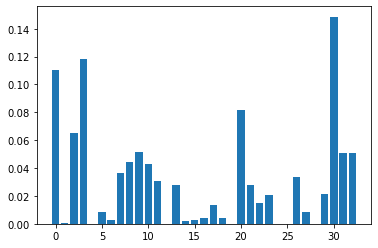

In [197]:
# perform permutation importance
results = permutation_importance(final_cl_8, X_train_oversampled_8, y_train_oversampled_8, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.06746
Feature: 1, Score: 0.00115
Feature: 2, Score: 0.03894
Feature: 3, Score: 0.07351
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00183
Feature: 6, Score: 0.00061
Feature: 7, Score: 0.01137
Feature: 8, Score: 0.01733
Feature: 9, Score: 0.02376
Feature: 10, Score: 0.01997
Feature: 11, Score: 0.01562
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01364
Feature: 14, Score: 0.00052
Feature: 15, Score: 0.00074
Feature: 16, Score: 0.00213
Feature: 17, Score: 0.00779
Feature: 18, Score: 0.00097
Feature: 19, Score: 0.00007
Feature: 20, Score: 0.05447
Feature: 21, Score: 0.01455
Feature: 22, Score: 0.00947
Feature: 23, Score: 0.01155
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01733
Feature: 27, Score: 0.00540
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00801
Feature: 30, Score: 0.12413
Feature: 31, Score: -0.01547
Feature: 32, Score: -0.01547


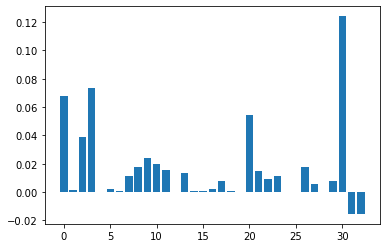

In [139]:
# perform permutation importance
results = permutation_importance(final_cl_8, X_train_oversampled_8, y_train_oversampled_8, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

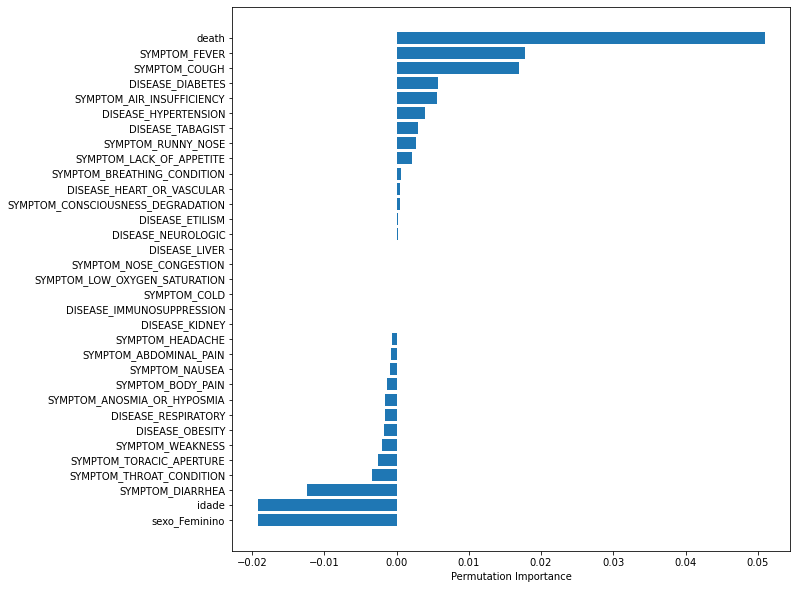

In [140]:
perm_importance = permutation_importance(final_cl_8, X_test_8, y_test_8)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 9 (23/10/2020 até 20/01/2021):

In [128]:
#Periodo 9
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=240)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=330)

df_9 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_9 = df_9.reset_index()
df_9 = df_9.drop("index", axis=1)
df_9

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.530435,1,0,2020-10-23
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2020-10-23
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.130435,1,0,2020-10-23
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.034783,0,1,2020-10-23
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.530435,0,1,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.643478,0,1,2021-01-20
2653,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0.391304,1,0,2021-01-20
2654,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.869565,0,1,2021-01-20
2655,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.634783,1,0,2021-01-20


In [129]:
X_train_oversampled_9, y_train_oversampled_9, X_test_9, y_test_9, mean_test_scores_9, std_test_scores_9, best_scores_9, best_params_9 = apply_model_svc(df_9)

########################################

best_score: 0.8604326210267145
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [130]:
preds_9, final_cl_9 = create_final_cl(X_train_oversampled_9, y_train_oversampled_9, X_test_9, y_test_9, 100, 1, 'rbf')

accuracy_score: 0.6762438682550805
########################################
"""Métricas f1_score:"""
f1:  0.5461689587426326
Macro:  0.647267485907264
Micro:  0.6762438682550805
weighted:  0.6782275814720461
########################################
"""Métricas precision_score:"""
Precision:  0.5315487571701721
Macro:  0.6457522546912808
Micro:  0.6762438682550805
weighted:  0.6807255752355866


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


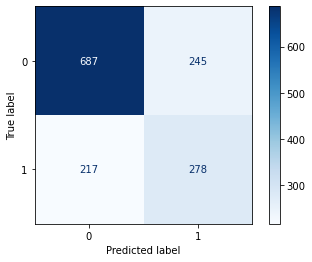

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       932
           1       0.53      0.56      0.55       495

    accuracy                           0.68      1427
   macro avg       0.65      0.65      0.65      1427
weighted avg       0.68      0.68      0.68      1427

roc_auc_score:  0.6493703125677375


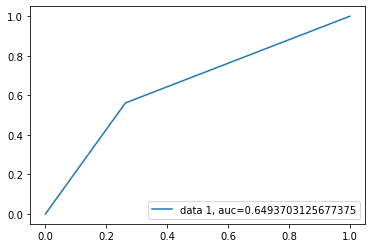

In [132]:
plot_conf_matrix (X_test_9, y_test_9, preds_9, final_cl_9)

plot_roc_curve(y_test_9, preds_9)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.08260
Feature: 1, Score: 0.00096
Feature: 2, Score: 0.06153
Feature: 3, Score: 0.11028
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00454
Feature: 6, Score: 0.00305
Feature: 7, Score: 0.05021
Feature: 8, Score: 0.05230
Feature: 9, Score: 0.06501
Feature: 10, Score: 0.05797
Feature: 11, Score: 0.05828
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02100
Feature: 14, Score: 0.00265
Feature: 15, Score: 0.00104
Feature: 16, Score: 0.00295
Feature: 17, Score: 0.00725
Feature: 18, Score: 0.00412
Feature: 19, Score: 0.00419
Feature: 20, Score: 0.07398
Feature: 21, Score: 0.02881
Feature: 22, Score: 0.01049
Feature: 23, Score: 0.02667
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02987
Feature: 27, Score: 0.01089
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01560
Feature: 30, Score: 0.13175
Feature: 31, Score: 0.07448
Feature: 32, Score: 0.07448


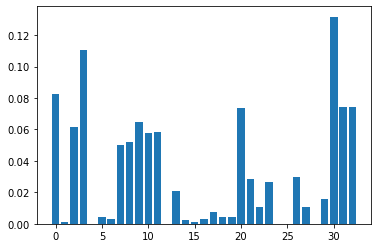

In [198]:
# perform permutation importance
results = permutation_importance(final_cl_9, X_train_oversampled_9, y_train_oversampled_9, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.06801
Feature: 1, Score: 0.00101
Feature: 2, Score: 0.04299
Feature: 3, Score: 0.08065
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00231
Feature: 6, Score: 0.00032
Feature: 7, Score: 0.02697
Feature: 8, Score: 0.03272
Feature: 9, Score: 0.03129
Feature: 10, Score: 0.03250
Feature: 11, Score: 0.03041
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01273
Feature: 14, Score: 0.00033
Feature: 15, Score: -0.00057
Feature: 16, Score: 0.00174
Feature: 17, Score: 0.00206
Feature: 18, Score: 0.00212
Feature: 19, Score: 0.00047
Feature: 20, Score: 0.04638
Feature: 21, Score: 0.01634
Feature: 22, Score: 0.00502
Feature: 23, Score: 0.01362
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01320
Feature: 27, Score: 0.00458
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00646
Feature: 30, Score: 0.10663
Feature: 31, Score: -0.00023
Feature: 32, Score: -0.00023


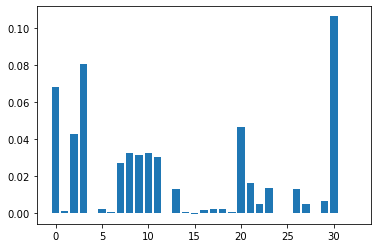

In [133]:
# perform permutation importance
results = permutation_importance(final_cl_9, X_train_oversampled_9, y_train_oversampled_9, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

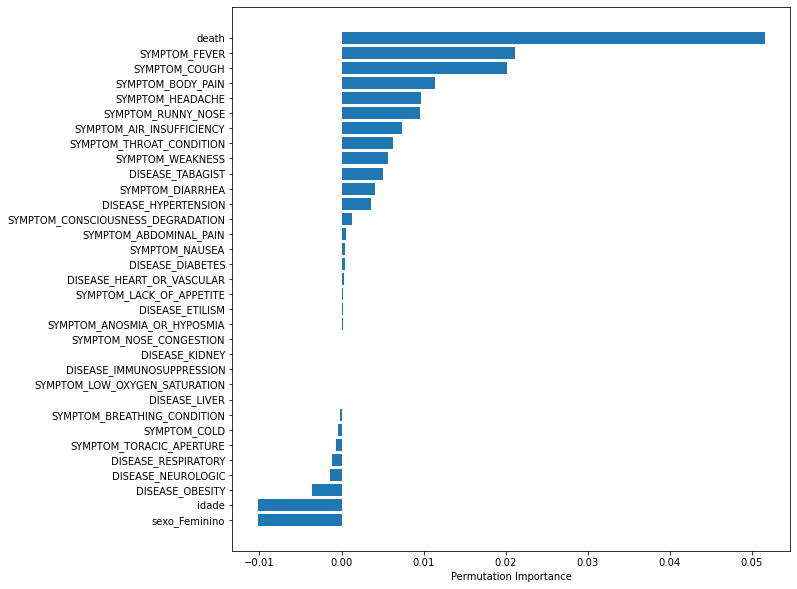

In [134]:
perm_importance = permutation_importance(final_cl_9, X_test_9, y_test_9)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 10 (22/11/2020 até 19/02/2021):

In [74]:
#Periodo 10
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=270)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=360)

df_10 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_10 = df_10.reset_index()
df_10 = df_10.drop("index", axis=1)
df_10

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.608696,1,0,2020-11-22
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.713043,1,0,2020-11-22
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.643478,1,0,2020-11-22
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.469565,1,0,2020-11-22
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.304348,1,0,2020-11-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.660870,1,0,2021-02-19
2812,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.634783,1,0,2021-02-19
2813,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2021-02-19
2814,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0.460870,0,1,2021-02-19


In [75]:
X_train_oversampled_10, y_train_oversampled_10, X_test_10, y_test_10, mean_test_scores_10, std_test_scores_10, best_scores_10, best_params_10 = apply_model_svc(df_10)

########################################

best_score: 0.8281760186179603
best_params_: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [76]:
preds_10, final_cl_10 = create_final_cl(X_train_oversampled_10, y_train_oversampled_10, X_test_10, y_test_10, 10, 1, 'rbf')

accuracy_score: 0.6819464033850494
########################################
"""Métricas f1_score:"""
f1:  0.5608568646543332
Macro:  0.6557739270756464
Micro:  0.6819464033850494
weighted:  0.6862973265566894
########################################
"""Métricas precision_score:"""
Precision:  0.5274725274725275
Macro:  0.6530711261215849
Micro:  0.6819464033850494
weighted:  0.6934610845023819


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


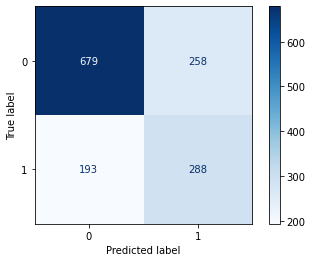

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       937
           1       0.53      0.60      0.56       481

    accuracy                           0.68      1418
   macro avg       0.65      0.66      0.66      1418
weighted avg       0.69      0.68      0.69      1418

roc_auc_score:  0.6617028735491916


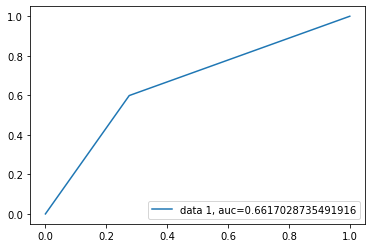

In [77]:
plot_conf_matrix (X_test_10, y_test_10, preds_10, final_cl_10)

plot_roc_curve(y_test_10, preds_10)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.07004
Feature: 1, Score: 0.00003
Feature: 2, Score: 0.04491
Feature: 3, Score: 0.08447
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00124
Feature: 6, Score: 0.00182
Feature: 7, Score: 0.02943
Feature: 8, Score: 0.06458
Feature: 9, Score: 0.07307
Feature: 10, Score: 0.04472
Feature: 11, Score: 0.05353
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.05394
Feature: 14, Score: 0.00175
Feature: 15, Score: -0.00009
Feature: 16, Score: 0.00327
Feature: 17, Score: 0.01105
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.08695
Feature: 21, Score: 0.02440
Feature: 22, Score: 0.01267
Feature: 23, Score: 0.03434
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02717
Feature: 27, Score: 0.00898
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00421
Feature: 30, Score: 0.05336
Feature: 31, Score: 0.02942
Feature: 32, Score: 0.02942


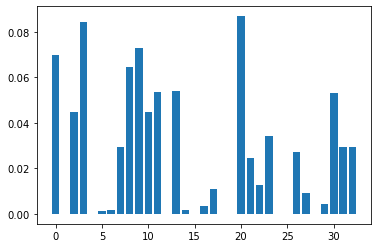

In [199]:
# perform permutation importance
results = permutation_importance(final_cl_10, X_train_oversampled_10, y_train_oversampled_10, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.05742
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03533
Feature: 3, Score: 0.06753
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00006
Feature: 6, Score: 0.00041
Feature: 7, Score: 0.01973
Feature: 8, Score: 0.03059
Feature: 9, Score: 0.03881
Feature: 10, Score: 0.02710
Feature: 11, Score: 0.03471
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02737
Feature: 14, Score: 0.00004
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00146
Feature: 17, Score: 0.00507
Feature: 18, Score: 0.00035
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.06433
Feature: 21, Score: 0.01534
Feature: 22, Score: 0.00582
Feature: 23, Score: 0.02070
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01971
Feature: 27, Score: 0.00673
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00376
Feature: 30, Score: 0.05249
Feature: 31, Score: -0.00115
Feature: 32, Score: -0.00115


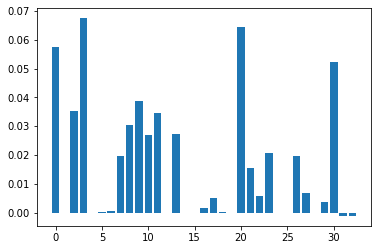

In [78]:
# perform permutation importance
results = permutation_importance(final_cl_10, X_train_oversampled_10, y_train_oversampled_10, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

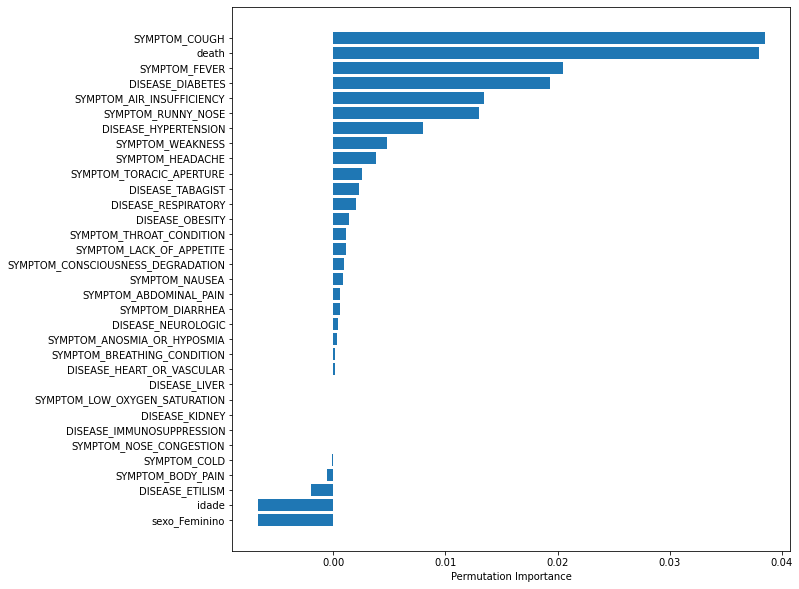

In [127]:
perm_importance = permutation_importance(final_cl_10, X_test_10, y_test_10)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 11 (22/12/2020 até 21/03/2021):

In [80]:
#Periodo 11
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=300)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=390)

df_11 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_11 = df_11.reset_index()
df_11 = df_11.drop("index", axis=1)
df_11

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.339130,1,0,2020-12-22
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.678261,1,0,2020-12-22
2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0.782609,1,0,2020-12-22
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.600000,1,0,2020-12-22
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0.591304,0,1,2020-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.765217,1,0,2021-03-21
3363,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.443478,0,1,2021-03-21
3364,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.582609,0,1,2021-03-21
3365,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0.400000,0,1,2021-03-21


In [81]:
X_train_oversampled_11, y_train_oversampled_11, X_test_11, y_test_11, mean_test_scores_11, std_test_scores_11, best_scores_11, best_params_11 = apply_model_svc(df_11)

########################################

best_score: 0.8027803526219099
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [82]:
preds_11, final_cl_11 = create_final_cl(X_train_oversampled_11, y_train_oversampled_11, X_test_11, y_test_11, 100, 1, 'rbf')

accuracy_score: 0.6908337648886588
########################################
"""Métricas f1_score:"""
f1:  0.5288082083662194
Macro:  0.6493752024490056
Micro:  0.6908337648886588
weighted:  0.6898972009781243
########################################
"""Métricas precision_score:"""
Precision:  0.5351437699680511
Macro:  0.6503305056736808
Micro:  0.6908337648886588
weighted:  0.6890442247171575


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


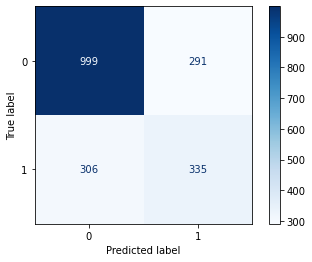

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1290
           1       0.54      0.52      0.53       641

    accuracy                           0.69      1931
   macro avg       0.65      0.65      0.65      1931
weighted avg       0.69      0.69      0.69      1931

roc_auc_score:  0.6485197547436781


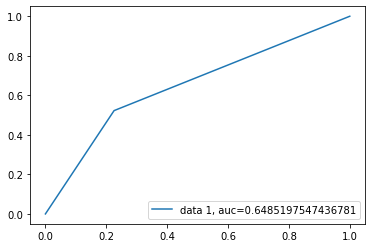

In [83]:
plot_conf_matrix (X_test_11, y_test_11, preds_11, final_cl_11)

plot_roc_curve(y_test_11, preds_11)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.09280
Feature: 1, Score: 0.00036
Feature: 2, Score: 0.06685
Feature: 3, Score: 0.10772
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00244
Feature: 6, Score: 0.00628
Feature: 7, Score: 0.03771
Feature: 8, Score: 0.05455
Feature: 9, Score: 0.07557
Feature: 10, Score: 0.03459
Feature: 11, Score: 0.03831
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.06398
Feature: 14, Score: 0.00622
Feature: 15, Score: 0.00080
Feature: 16, Score: 0.00433
Feature: 17, Score: 0.00661
Feature: 18, Score: 0.00383
Feature: 19, Score: 0.00023
Feature: 20, Score: 0.10978
Feature: 21, Score: 0.03614
Feature: 22, Score: 0.00682
Feature: 23, Score: 0.03663
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02376
Feature: 27, Score: 0.01287
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00545
Feature: 30, Score: 0.11134
Feature: 31, Score: 0.06351
Feature: 32, Score: 0.06351


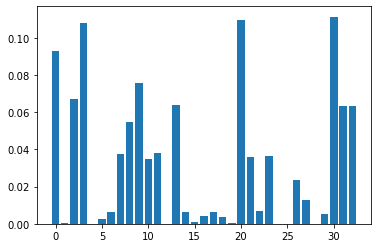

In [200]:
# perform permutation importance
results = permutation_importance(final_cl_11, X_train_oversampled_11, y_train_oversampled_11, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.07139
Feature: 1, Score: 0.00071
Feature: 2, Score: 0.04391
Feature: 3, Score: 0.07490
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00131
Feature: 6, Score: 0.00328
Feature: 7, Score: 0.01856
Feature: 8, Score: 0.03517
Feature: 9, Score: 0.03911
Feature: 10, Score: 0.01939
Feature: 11, Score: 0.03168
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.03565
Feature: 14, Score: 0.00205
Feature: 15, Score: 0.00071
Feature: 16, Score: 0.00302
Feature: 17, Score: 0.00506
Feature: 18, Score: 0.00226
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.08923
Feature: 21, Score: 0.03204
Feature: 22, Score: 0.00446
Feature: 23, Score: 0.02290
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01694
Feature: 27, Score: 0.00833
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00213
Feature: 30, Score: 0.08706
Feature: 31, Score: 0.00305
Feature: 32, Score: 0.00305


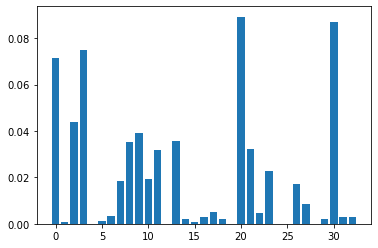

In [84]:
# perform permutation importance
results = permutation_importance(final_cl_11, X_train_oversampled_11, y_train_oversampled_11, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

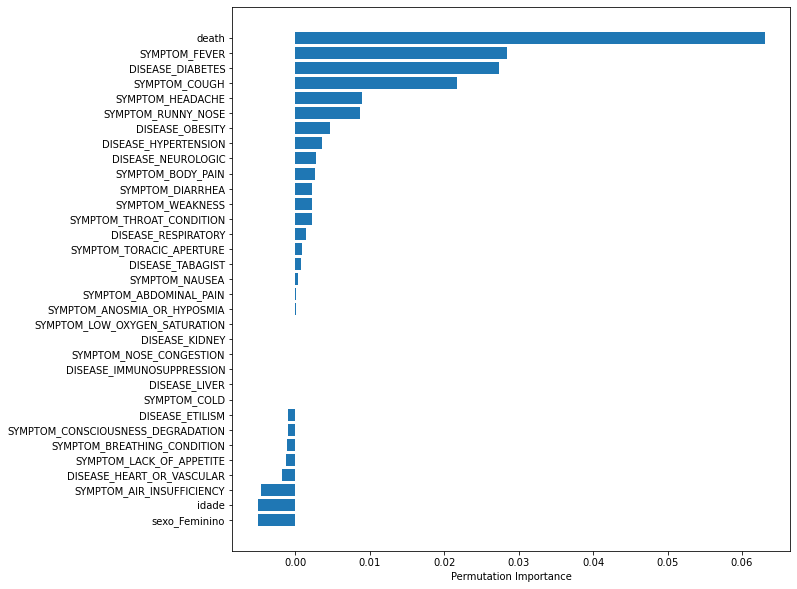

In [126]:
perm_importance = permutation_importance(final_cl_11, X_test_11, y_test_11)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")


### Teste com o Período 12 (21/01/2021 até 20/04/2021):

In [86]:
#Periodo 12
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=330)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=420)

df_12 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_12 = df_12.reset_index()
df_12 = df_12.drop("index", axis=1)
df_12

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.626087,1,0,2021-01-21
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.339130,0,1,2021-01-21
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.530435,0,1,2021-01-21
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.556522,0,1,2021-01-21
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.295652,1,0,2021-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.591304,0,1,2021-04-20
4467,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.478261,1,0,2021-04-20
4468,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2021-04-20
4469,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.765217,1,0,2021-04-20


In [87]:
X_train_oversampled_12, y_train_oversampled_12, X_test_12, y_test_12, mean_test_scores_12, std_test_scores_12, best_scores_12, best_params_12 = apply_model_svc(df_12)

########################################

best_score: 0.8138946174961212
best_params_: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [88]:
preds_12, final_cl_12 = create_final_cl(X_train_oversampled_12, y_train_oversampled_12, X_test_12, y_test_12, 10, 1, 'rbf')

accuracy_score: 0.6585281980742779
########################################
"""Métricas f1_score:"""
f1:  0.46003262642740617
Macro:  0.6051734668470952
Micro:  0.6585281980742779
weighted:  0.6558829214091323
########################################
"""Métricas precision_score:"""
Precision:  0.47368421052631576
Macro:  0.6070654303251927
Micro:  0.6585281980742779
weighted:  0.6536662966648278


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


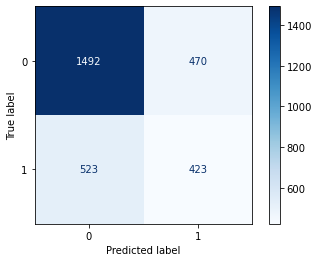

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1962
           1       0.47      0.45      0.46       946

    accuracy                           0.66      2908
   macro avg       0.61      0.60      0.61      2908
weighted avg       0.65      0.66      0.66      2908

roc_auc_score:  0.6037971996474237


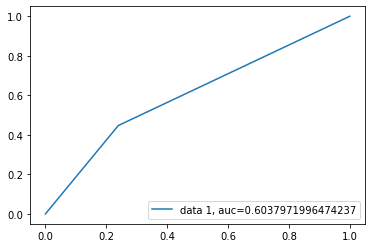

In [89]:
plot_conf_matrix (X_test_12, y_test_12, preds_12, final_cl_12)

plot_roc_curve(y_test_12, preds_12)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.10273
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.03608
Feature: 3, Score: 0.07270
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00659
Feature: 6, Score: 0.00413
Feature: 7, Score: 0.03676
Feature: 8, Score: 0.03979
Feature: 9, Score: 0.06386
Feature: 10, Score: 0.03052
Feature: 11, Score: 0.02470
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.04592
Feature: 14, Score: 0.00142
Feature: 15, Score: 0.00096
Feature: 16, Score: 0.00575
Feature: 17, Score: 0.01128
Feature: 18, Score: 0.00334
Feature: 19, Score: 0.00293
Feature: 20, Score: 0.07920
Feature: 21, Score: 0.03148
Feature: 22, Score: 0.00468
Feature: 23, Score: 0.03745
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.03183
Feature: 27, Score: 0.01136
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01176
Feature: 30, Score: 0.07081
Feature: 31, Score: 0.03187
Feature: 32, Score: 0.03187


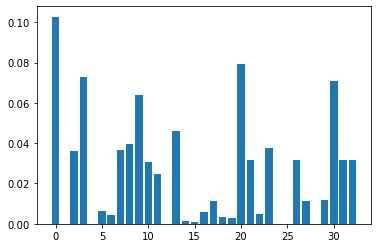

In [201]:
# perform permutation importance
results = permutation_importance(final_cl_12, X_train_oversampled_12, y_train_oversampled_12, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.07370
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.02599
Feature: 3, Score: 0.04265
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00365
Feature: 7, Score: 0.01683
Feature: 8, Score: 0.03922
Feature: 9, Score: 0.05369
Feature: 10, Score: 0.01735
Feature: 11, Score: 0.01907
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.03906
Feature: 14, Score: 0.00067
Feature: 15, Score: 0.00067
Feature: 16, Score: 0.00458
Feature: 17, Score: 0.00432
Feature: 18, Score: 0.00407
Feature: 19, Score: 0.00245
Feature: 20, Score: 0.04810
Feature: 21, Score: 0.02597
Feature: 22, Score: 0.00245
Feature: 23, Score: 0.01727
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01876
Feature: 27, Score: 0.00632
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00866
Feature: 30, Score: 0.06342
Feature: 31, Score: -0.00434
Feature: 32, Score: -0.00434


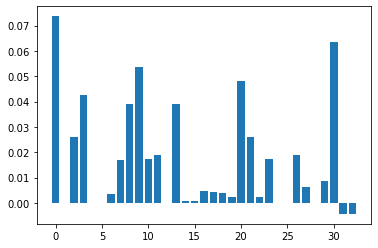

In [90]:
# perform permutation importance
results = permutation_importance(final_cl_12, X_train_oversampled_12, y_train_oversampled_12, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

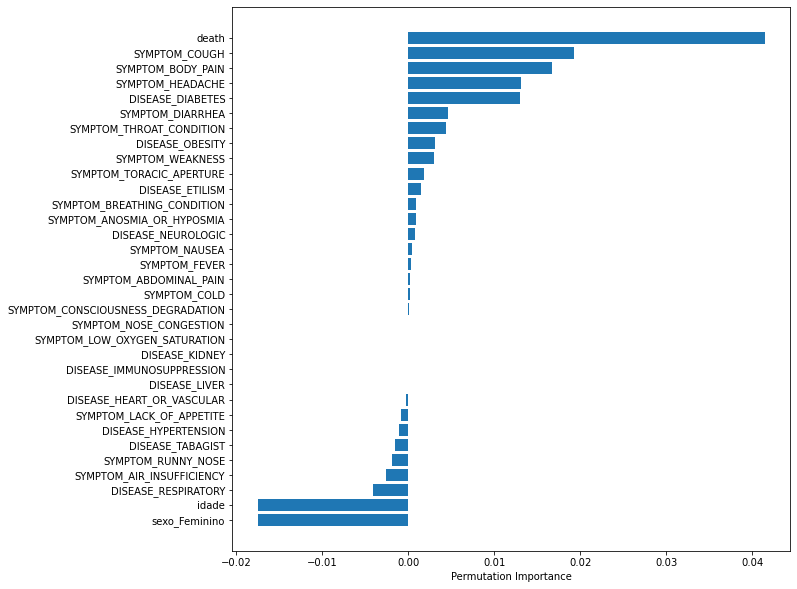

In [125]:
perm_importance = permutation_importance(final_cl_12, X_test_12, y_test_12)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 13 (20/02/2021 até 20/05/2021):

In [92]:
#Periodo 13
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=360)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=450)

df_13 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_13 = df_13.reset_index()
df_13 = df_13.drop("index", axis=1)
df_13

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.539130,1,0,2021-02-20
1,0,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0.486957,0,1,2021-02-20
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.495652,1,0,2021-02-20
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.295652,1,0,2021-02-20
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.808696,0,1,2021-02-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.191304,0,1,2021-05-20
5358,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.417391,1,0,2021-05-20
5359,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0.547826,1,0,2021-05-20
5360,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0.756522,1,0,2021-05-20


In [93]:
X_train_oversampled_13, y_train_oversampled_13, X_test_13, y_test_13, mean_test_scores_13, std_test_scores_13, best_scores_13, best_params_13 = apply_model_svc(df_13)

########################################

best_score: 0.8184367246102484
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [94]:
preds_13, final_cl_13 = create_final_cl(X_train_oversampled_13, y_train_oversampled_13, X_test_13, y_test_13, 100, 1, 'rbf')

accuracy_score: 0.6765567765567766
########################################
"""Métricas f1_score:"""
f1:  0.4974388161639158
Macro:  0.6294917548278397
Micro:  0.6765567765567766
weighted:  0.6777660525518675
########################################
"""Métricas precision_score:"""
Precision:  0.4904601571268238
Macro:  0.6285906005862504
Micro:  0.6765567765567766
weighted:  0.6790866381585976


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


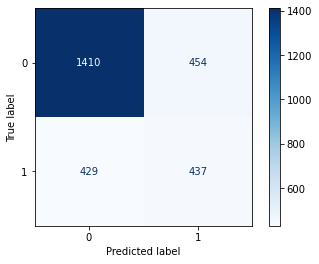

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1864
           1       0.49      0.50      0.50       866

    accuracy                           0.68      2730
   macro avg       0.63      0.63      0.63      2730
weighted avg       0.68      0.68      0.68      2730

roc_auc_score:  0.6305283529423427


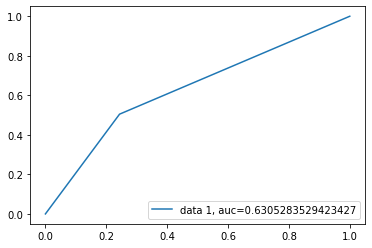

In [95]:
plot_conf_matrix (X_test_13, y_test_13, preds_13, final_cl_13)

plot_roc_curve(y_test_13, preds_13)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.07798
Feature: 1, Score: 0.00131
Feature: 2, Score: 0.05833
Feature: 3, Score: 0.07355
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00440
Feature: 6, Score: 0.00198
Feature: 7, Score: 0.04615
Feature: 8, Score: 0.05650
Feature: 9, Score: 0.06235
Feature: 10, Score: 0.03454
Feature: 11, Score: 0.03232
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.04821
Feature: 14, Score: 0.00287
Feature: 15, Score: 0.00250
Feature: 16, Score: 0.00690
Feature: 17, Score: 0.00833
Feature: 18, Score: 0.00129
Feature: 19, Score: 0.00312
Feature: 20, Score: 0.08828
Feature: 21, Score: 0.03391
Feature: 22, Score: 0.00562
Feature: 23, Score: 0.04050
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02250
Feature: 27, Score: 0.01350
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00799
Feature: 30, Score: 0.14883
Feature: 31, Score: 0.04691
Feature: 32, Score: 0.04691


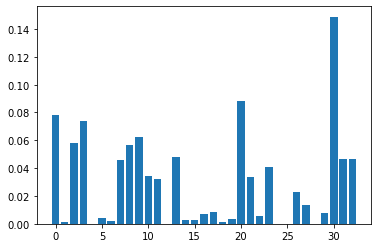

In [202]:
# perform permutation importance
results = permutation_importance(final_cl_13, X_train_oversampled_13, y_train_oversampled_13, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.05601
Feature: 1, Score: 0.00062
Feature: 2, Score: 0.03563
Feature: 3, Score: 0.05936
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00252
Feature: 6, Score: 0.00214
Feature: 7, Score: 0.02554
Feature: 8, Score: 0.03274
Feature: 9, Score: 0.04535
Feature: 10, Score: 0.02184
Feature: 11, Score: 0.01804
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.03503
Feature: 14, Score: 0.00209
Feature: 15, Score: 0.00131
Feature: 16, Score: 0.00396
Feature: 17, Score: 0.00610
Feature: 18, Score: 0.00105
Feature: 19, Score: 0.00182
Feature: 20, Score: 0.07223
Feature: 21, Score: 0.02895
Feature: 22, Score: 0.00337
Feature: 23, Score: 0.02814
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01569
Feature: 27, Score: 0.00600
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00879
Feature: 30, Score: 0.13103
Feature: 31, Score: 0.00548
Feature: 32, Score: 0.00548


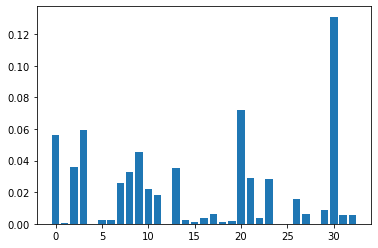

In [96]:
# perform permutation importance
results = permutation_importance(final_cl_13, X_train_oversampled_13, y_train_oversampled_13, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

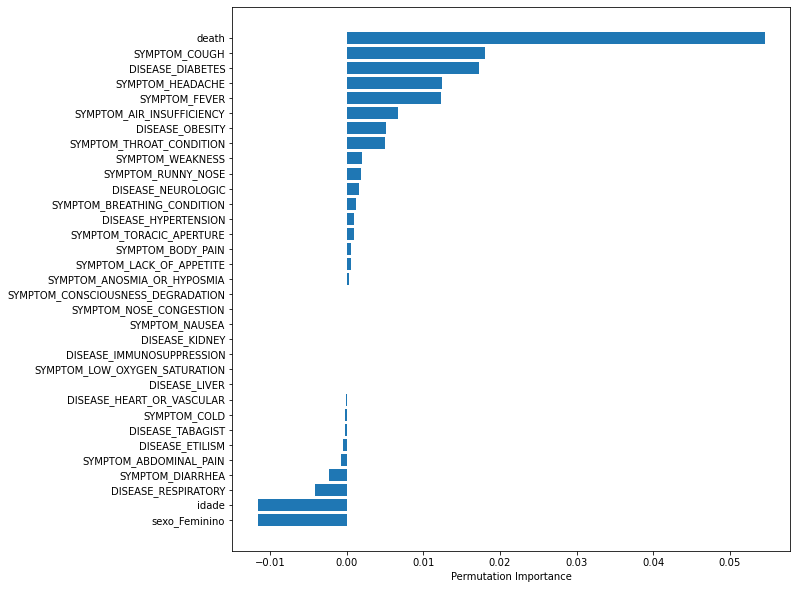

In [97]:
perm_importance = permutation_importance(final_cl_13, X_test_13, y_test_13)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 14 (22/03/2021 até 19/06/2021):

In [98]:
#Periodo 14
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=390)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=480)

df_14 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_14 = df_14.reset_index()
df_14 = df_14.drop("index", axis=1)
df_14

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0.469565,0,1,2021-03-22
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.443478,1,0,2021-03-22
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0.417391,1,0,2021-03-22
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.478261,1,0,2021-03-22
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.678261,0,1,2021-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0.478261,0,1,2021-06-19
5618,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2021-06-19
5619,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.504348,0,1,2021-06-19
5620,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.469565,1,0,2021-06-19


In [99]:
X_train_oversampled_14, y_train_oversampled_14, X_test_14, y_test_14, mean_test_scores_14, std_test_scores_14, best_scores_14, best_params_14 = apply_model_svc(df_14)

########################################

best_score: 0.7921805810521236
best_params_: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [100]:
preds_14, final_cl_14 = create_final_cl(X_train_oversampled_14, y_train_oversampled_14, X_test_14, y_test_14, 10, 1, 'rbf')

accuracy_score: 0.6831228473019518
########################################
"""Métricas f1_score:"""
f1:  0.4844333748443338
Macro:  0.6278520465381889
Micro:  0.6831228473019518
weighted:  0.6893799190865287
########################################
"""Métricas precision_score:"""
Precision:  0.45232558139534884
Macro:  0.624337348598416
Micro:  0.6831228473019518
weighted:  0.6981319108007268


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


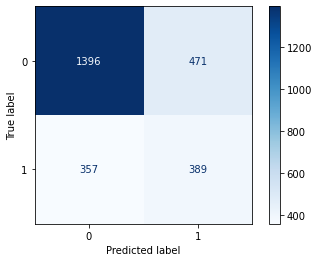

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1867
           1       0.45      0.52      0.48       746

    accuracy                           0.68      2613
   macro avg       0.62      0.63      0.63      2613
weighted avg       0.70      0.68      0.69      2613

roc_auc_score:  0.634585670980814


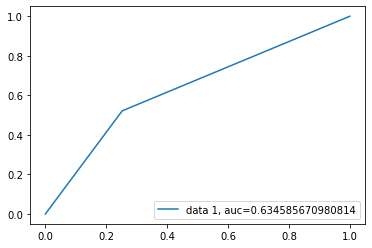

In [101]:
plot_conf_matrix (X_test_14, y_test_14, preds_14, final_cl_14)

plot_roc_curve(y_test_14, preds_14)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.06220
Feature: 1, Score: 0.00078
Feature: 2, Score: 0.05137
Feature: 3, Score: 0.07581
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00597
Feature: 6, Score: 0.00124
Feature: 7, Score: 0.03903
Feature: 8, Score: 0.05170
Feature: 9, Score: 0.07796
Feature: 10, Score: 0.04246
Feature: 11, Score: 0.03590
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02824
Feature: 14, Score: 0.00315
Feature: 15, Score: 0.00226
Feature: 16, Score: 0.00652
Feature: 17, Score: 0.00356
Feature: 18, Score: 0.00160
Feature: 19, Score: 0.00191
Feature: 20, Score: 0.08232
Feature: 21, Score: 0.03882
Feature: 22, Score: 0.00828
Feature: 23, Score: 0.04477
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01890
Feature: 27, Score: 0.00529
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00753
Feature: 30, Score: 0.05753
Feature: 31, Score: 0.03266
Feature: 32, Score: 0.03266


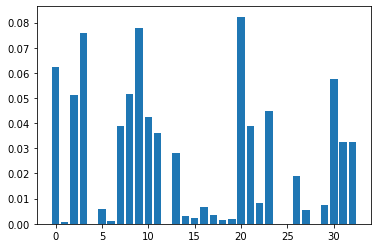

In [203]:
# perform permutation importance
results = permutation_importance(final_cl_14, X_train_oversampled_14, y_train_oversampled_14, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.06070
Feature: 1, Score: 0.00038
Feature: 2, Score: 0.03733
Feature: 3, Score: 0.06901
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00408
Feature: 6, Score: 0.00118
Feature: 7, Score: 0.02020
Feature: 8, Score: 0.03752
Feature: 9, Score: 0.05123
Feature: 10, Score: 0.02646
Feature: 11, Score: 0.02850
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01818
Feature: 14, Score: 0.00201
Feature: 15, Score: 0.00175
Feature: 16, Score: 0.00478
Feature: 17, Score: 0.00344
Feature: 18, Score: 0.00279
Feature: 19, Score: 0.00136
Feature: 20, Score: 0.06922
Feature: 21, Score: 0.03133
Feature: 22, Score: 0.00813
Feature: 23, Score: 0.03301
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01261
Feature: 27, Score: 0.00321
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00682
Feature: 30, Score: 0.05319
Feature: 31, Score: -0.00795
Feature: 32, Score: -0.00795


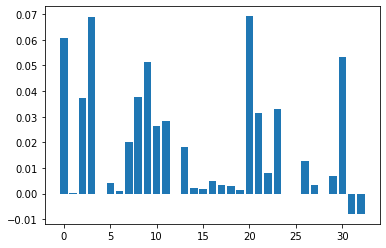

In [102]:
# perform permutation importance
results = permutation_importance(final_cl_14, X_train_oversampled_14, y_train_oversampled_14, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

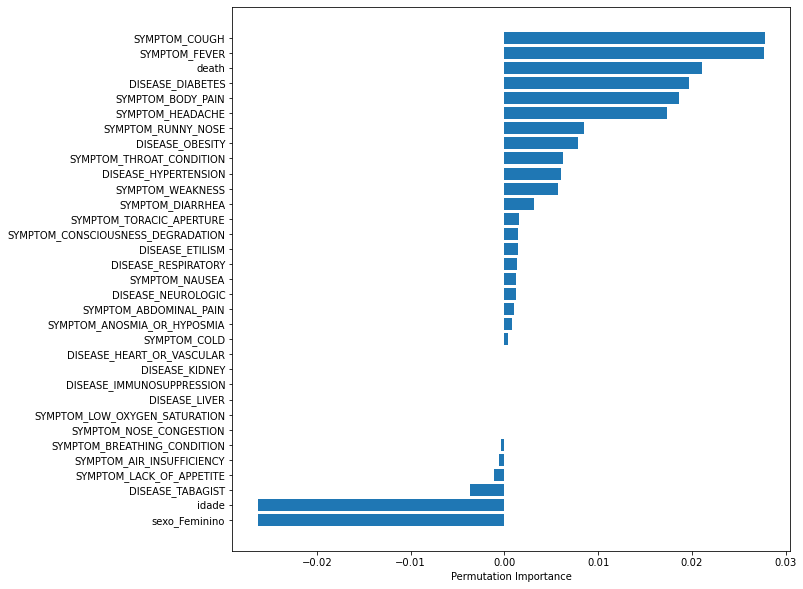

In [103]:
perm_importance = permutation_importance(final_cl_14, X_test_14, y_test_14)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 15 (21/04/2021 até 19/07/2021):

In [104]:
#Periodo 15
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=420)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=510)

df_15 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_15 = df_15.reset_index()
df_15 = df_15.drop("index", axis=1)
df_15

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2021-04-21
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.608696,0,1,2021-04-21
2,1,0,1,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0.452174,0,1,2021-04-21
3,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0.504348,1,0,2021-04-21
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.643478,1,0,2021-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.547826,1,0,2021-07-19
4720,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.513043,1,0,2021-07-19
4721,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.243478,0,1,2021-07-19
4722,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.356522,0,1,2021-07-19


In [105]:
X_train_oversampled_15, y_train_oversampled_15, X_test_15, y_test_15, mean_test_scores_15, std_test_scores_15, best_scores_15, best_params_15 = apply_model_svc(df_15)

########################################

best_score: 0.8283499699854214
best_params_: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [106]:
preds_15, final_cl_15 = create_final_cl(X_train_oversampled_15, y_train_oversampled_15, X_test_15, y_test_15, 100, 0.1, 'rbf')

accuracy_score: 0.6826411075612353
########################################
"""Métricas f1_score:"""
f1:  0.4914675767918089
Macro:  0.6304087109965237
Micro:  0.6826411075612353
weighted:  0.6904833654023962
########################################
"""Métricas precision_score:"""
Precision:  0.4507042253521127
Macro:  0.6264820561788812
Micro:  0.6826411075612353
weighted:  0.7024839723830005


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


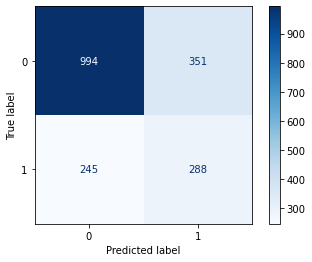

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1345
           1       0.45      0.54      0.49       533

    accuracy                           0.68      1878
   macro avg       0.63      0.64      0.63      1878
weighted avg       0.70      0.68      0.69      1878

roc_auc_score:  0.6396855841592445


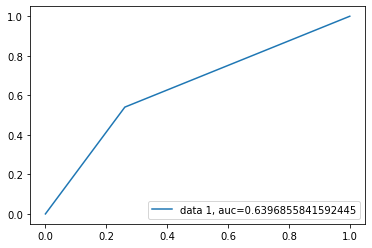

In [107]:
plot_conf_matrix (X_test_15, y_test_15, preds_15, final_cl_15)

plot_roc_curve(y_test_15, preds_15)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.04499
Feature: 1, Score: -0.00004
Feature: 2, Score: 0.03518
Feature: 3, Score: 0.04685
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00276
Feature: 6, Score: 0.00306
Feature: 7, Score: 0.02493
Feature: 8, Score: 0.03874
Feature: 9, Score: 0.04897
Feature: 10, Score: 0.02692
Feature: 11, Score: 0.04189
Feature: 12, Score: 0.00094
Feature: 13, Score: 0.01875
Feature: 14, Score: 0.00288
Feature: 15, Score: 0.00333
Feature: 16, Score: 0.00308
Feature: 17, Score: 0.00419
Feature: 18, Score: 0.00399
Feature: 19, Score: 0.00269
Feature: 20, Score: 0.06967
Feature: 21, Score: 0.02820
Feature: 22, Score: 0.00566
Feature: 23, Score: 0.05434
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01222
Feature: 27, Score: 0.00504
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00669
Feature: 30, Score: 0.07172
Feature: 31, Score: 0.01475
Feature: 32, Score: 0.01475


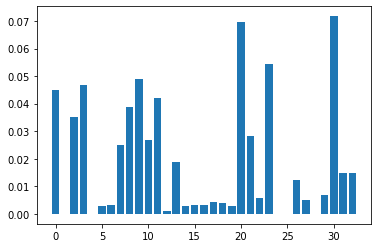

In [204]:
# perform permutation importance
results = permutation_importance(final_cl_15, X_train_oversampled_15, y_train_oversampled_15, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.05033
Feature: 1, Score: 0.00004
Feature: 2, Score: 0.03076
Feature: 3, Score: 0.04850
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00034
Feature: 6, Score: 0.00172
Feature: 7, Score: 0.02129
Feature: 8, Score: 0.03251
Feature: 9, Score: 0.03314
Feature: 10, Score: 0.02002
Feature: 11, Score: 0.02387
Feature: 12, Score: 0.00070
Feature: 13, Score: 0.01854
Feature: 14, Score: 0.00269
Feature: 15, Score: 0.00251
Feature: 16, Score: 0.00201
Feature: 17, Score: 0.00336
Feature: 18, Score: 0.00395
Feature: 19, Score: 0.00142
Feature: 20, Score: 0.07477
Feature: 21, Score: 0.01748
Feature: 22, Score: 0.00554
Feature: 23, Score: 0.04265
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01134
Feature: 27, Score: 0.00399
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00759
Feature: 30, Score: 0.06804
Feature: 31, Score: 0.00741
Feature: 32, Score: 0.00741


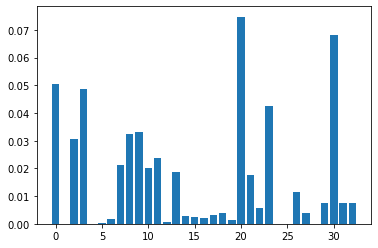

In [108]:
# perform permutation importance
results = permutation_importance(final_cl_15, X_train_oversampled_15, y_train_oversampled_15, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

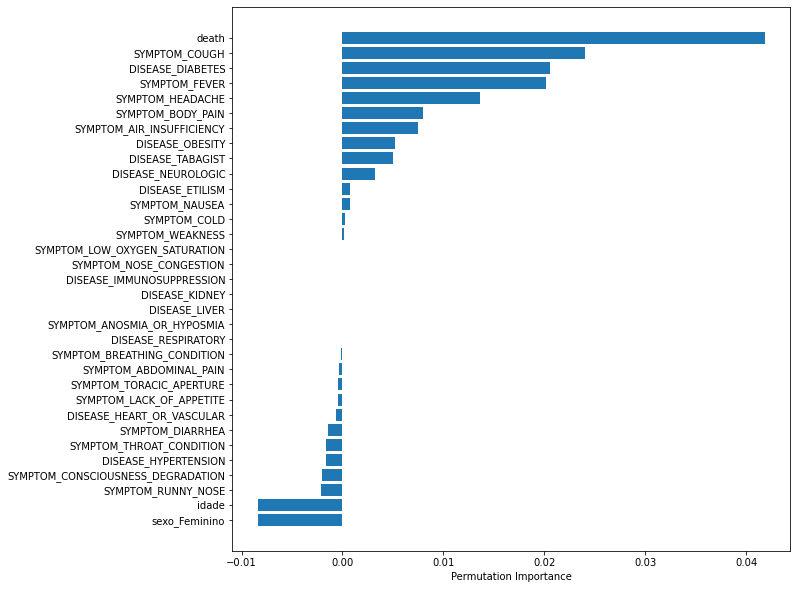

In [109]:
perm_importance = permutation_importance(final_cl_15, X_test_15, y_test_15)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")


### Teste com o Período 16 (21/05/2021 até 18/08/2021):

In [110]:
#Periodo 16
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=450)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=540)

df_16 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_16 = df_16.reset_index()
df_16 = df_16.drop("index", axis=1)
df_16

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.486957,0,1,2021-05-21
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.591304,1,0,2021-05-21
2,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0.295652,0,1,2021-05-21
3,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.347826,0,1,2021-05-21
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.504348,0,1,2021-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.617391,0,1,2021-08-18
3497,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.060870,0,1,2021-08-18
3498,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.556522,0,1,2021-08-18
3499,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.060870,0,1,2021-08-18


In [111]:
X_train_oversampled_16, y_train_oversampled_16, X_test_16, y_test_16, mean_test_scores_16, std_test_scores_16, best_scores_16, best_params_16 = apply_model_svc(df_16)

########################################

best_score: 0.8330719307733909
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [112]:
preds_16, final_cl_16 = create_final_cl(X_train_oversampled_16, y_train_oversampled_16, X_test_16, y_test_16, 100, 1, 'rbf')

accuracy_score: 0.6871055004508566
########################################
"""Métricas f1_score:"""
f1:  0.5452162516382701
Macro:  0.6533641395648395
Micro:  0.6871055004508566
weighted:  0.6873980556030476
########################################
"""Métricas precision_score:"""
Precision:  0.5430809399477807
Macro:  0.6530831696984083
Micro:  0.6871055004508566
weighted:  0.687700643262853


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


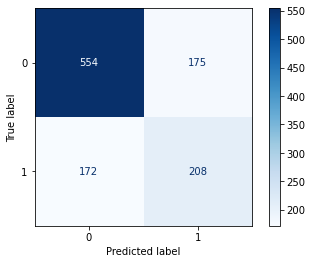

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       729
           1       0.54      0.55      0.55       380

    accuracy                           0.69      1109
   macro avg       0.65      0.65      0.65      1109
weighted avg       0.69      0.69      0.69      1109

roc_auc_score:  0.6536567756840661


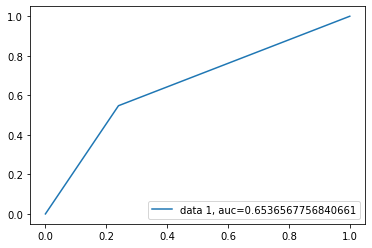

In [113]:
plot_conf_matrix (X_test_16, y_test_16, preds_16, final_cl_16)

plot_roc_curve(y_test_16, preds_16)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.09185
Feature: 1, Score: 0.00005
Feature: 2, Score: 0.08157
Feature: 3, Score: 0.10870
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00090
Feature: 6, Score: 0.00358
Feature: 7, Score: 0.04793
Feature: 8, Score: 0.07881
Feature: 9, Score: 0.08860
Feature: 10, Score: 0.06058
Feature: 11, Score: 0.04812
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.03444
Feature: 14, Score: 0.00295
Feature: 15, Score: 0.00595
Feature: 16, Score: 0.00389
Feature: 17, Score: 0.00846
Feature: 18, Score: 0.00531
Feature: 19, Score: 0.00071
Feature: 20, Score: 0.08200
Feature: 21, Score: 0.04813
Feature: 22, Score: 0.00537
Feature: 23, Score: 0.05706
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02197
Feature: 27, Score: 0.00488
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01038
Feature: 30, Score: 0.10415
Feature: 31, Score: 0.06243
Feature: 32, Score: 0.06243


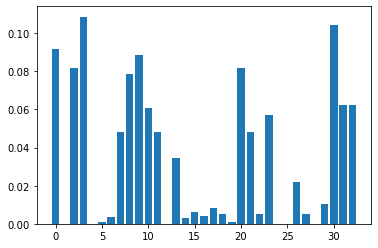

In [205]:
# perform permutation importance
results = permutation_importance(final_cl_16, X_train_oversampled_16, y_train_oversampled_16, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.07748
Feature: 1, Score: -0.00019
Feature: 2, Score: 0.04741
Feature: 3, Score: 0.08991
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00049
Feature: 6, Score: 0.00082
Feature: 7, Score: 0.02151
Feature: 8, Score: 0.05049
Feature: 9, Score: 0.05281
Feature: 10, Score: 0.03605
Feature: 11, Score: 0.03887
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01886
Feature: 14, Score: 0.00224
Feature: 15, Score: 0.00289
Feature: 16, Score: 0.00244
Feature: 17, Score: 0.00635
Feature: 18, Score: 0.00360
Feature: 19, Score: 0.00029
Feature: 20, Score: 0.07108
Feature: 21, Score: 0.02978
Feature: 22, Score: 0.00085
Feature: 23, Score: 0.04332
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01862
Feature: 27, Score: 0.00379
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00600
Feature: 30, Score: 0.10630
Feature: 31, Score: -0.00069
Feature: 32, Score: -0.00069


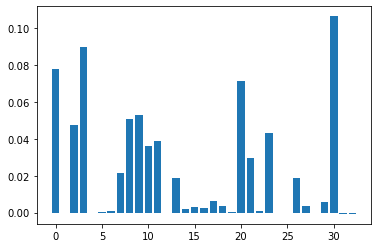

In [114]:
# perform permutation importance
results = permutation_importance(final_cl_16, X_train_oversampled_16, y_train_oversampled_16, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

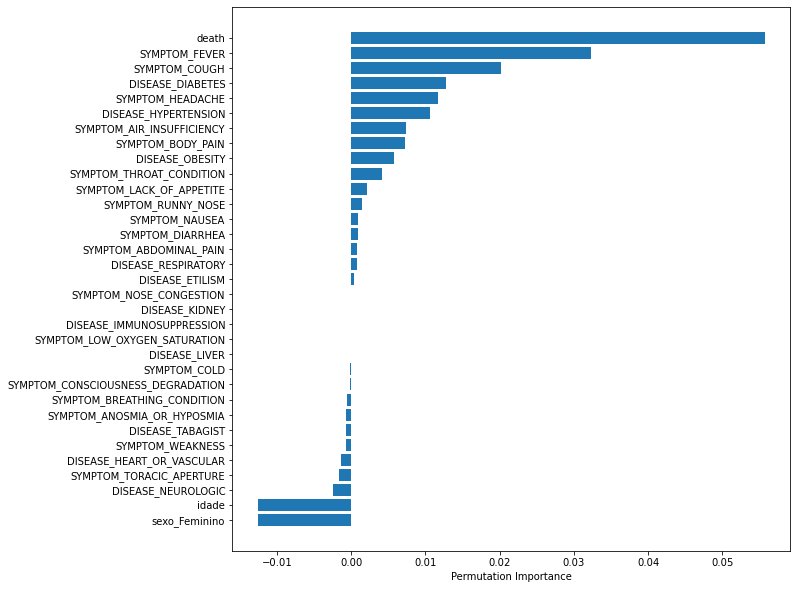

In [115]:
perm_importance = permutation_importance(final_cl_16, X_test_16, y_test_16)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")


### Teste com o Período 17 (20/06/2021 até 17/09/2021):

In [68]:
#Periodo 17
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=480)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=570)

df_17 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_17 = df_17.reset_index()
df_17 = df_17.drop("index", axis=1)
df_17

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0.486957,1,0,2021-06-20
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.426087,1,0,2021-06-20
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.617391,0,1,2021-06-20
3,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0.591304,0,1,2021-06-20
4,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0.321739,1,0,2021-06-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0.356522,1,0,2021-09-17
2310,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.365217,0,1,2021-09-17
2311,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.052174,0,1,2021-09-17
2312,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.356522,0,1,2021-09-17


In [69]:
X_train_oversampled_17, y_train_oversampled_17, X_test_17, y_test_17, mean_test_scores_17, std_test_scores_17, best_scores_17, best_params_17 = apply_model_svc(df_17)

########################################

best_score: 0.8138495170868708
best_params_: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [70]:
preds_17, final_cl_17 = create_final_cl(X_train_oversampled_17, y_train_oversampled_17, X_test_17, y_test_17, 10, 1, 'rbf')

accuracy_score: 0.6376262626262627
########################################
"""Métricas f1_score:"""
f1:  0.47145488029465926
Macro:  0.5978792172846976
Micro:  0.6376262626262627
weighted:  0.6476827439777431
########################################
"""Métricas precision_score:"""
Precision:  0.42244224422442245
Macro:  0.5967016947093482
Micro:  0.6376262626262627
weighted:  0.6653493570215917


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


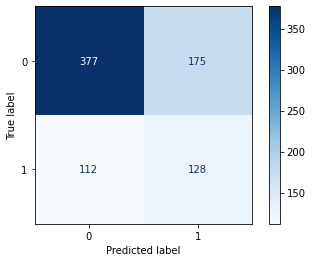

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       552
           1       0.42      0.53      0.47       240

    accuracy                           0.64       792
   macro avg       0.60      0.61      0.60       792
weighted avg       0.67      0.64      0.65       792

roc_auc_score:  0.6081521739130435


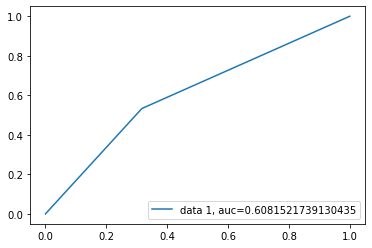

In [71]:
plot_conf_matrix (X_test_17, y_test_17, preds_17, final_cl_17)

plot_roc_curve(y_test_17, preds_17)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.09315
Feature: 1, Score: 0.00012
Feature: 2, Score: 0.06725
Feature: 3, Score: 0.07864
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00128
Feature: 6, Score: 0.00600
Feature: 7, Score: 0.02662
Feature: 8, Score: 0.03572
Feature: 9, Score: 0.04918
Feature: 10, Score: 0.04104
Feature: 11, Score: 0.03041
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02687
Feature: 14, Score: 0.00227
Feature: 15, Score: 0.00259
Feature: 16, Score: 0.00508
Feature: 17, Score: 0.00729
Feature: 18, Score: 0.00382
Feature: 19, Score: 0.00420
Feature: 20, Score: 0.08561
Feature: 21, Score: 0.04630
Feature: 22, Score: 0.00281
Feature: 23, Score: 0.04899
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.03031
Feature: 27, Score: 0.00149
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01075
Feature: 30, Score: 0.07344
Feature: 31, Score: 0.05417
Feature: 32, Score: 0.05417


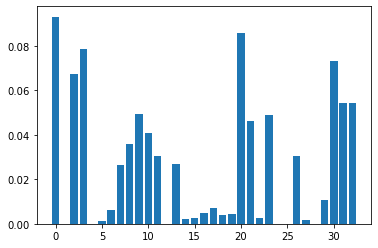

In [206]:
# perform permutation importance
results = permutation_importance(final_cl_17, X_train_oversampled_17, y_train_oversampled_17, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.07628
Feature: 1, Score: -0.00008
Feature: 2, Score: 0.03605
Feature: 3, Score: 0.05262
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00200
Feature: 6, Score: 0.00356
Feature: 7, Score: 0.01612
Feature: 8, Score: 0.02042
Feature: 9, Score: 0.03441
Feature: 10, Score: 0.01579
Feature: 11, Score: 0.02452
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01773
Feature: 14, Score: 0.00192
Feature: 15, Score: 0.00097
Feature: 16, Score: 0.00209
Feature: 17, Score: 0.00760
Feature: 18, Score: 0.00260
Feature: 19, Score: 0.00300
Feature: 20, Score: 0.05827
Feature: 21, Score: 0.03327
Feature: 22, Score: 0.00135
Feature: 23, Score: 0.03123
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02189
Feature: 27, Score: 0.00013
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00668
Feature: 30, Score: 0.05026
Feature: 31, Score: -0.00588
Feature: 32, Score: -0.00588


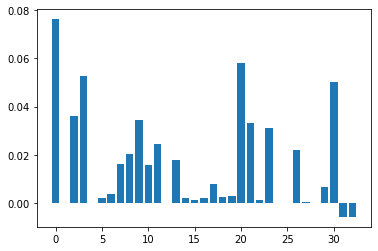

In [72]:
# perform permutation importance
results = permutation_importance(final_cl_17, X_train_oversampled_17, y_train_oversampled_17, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

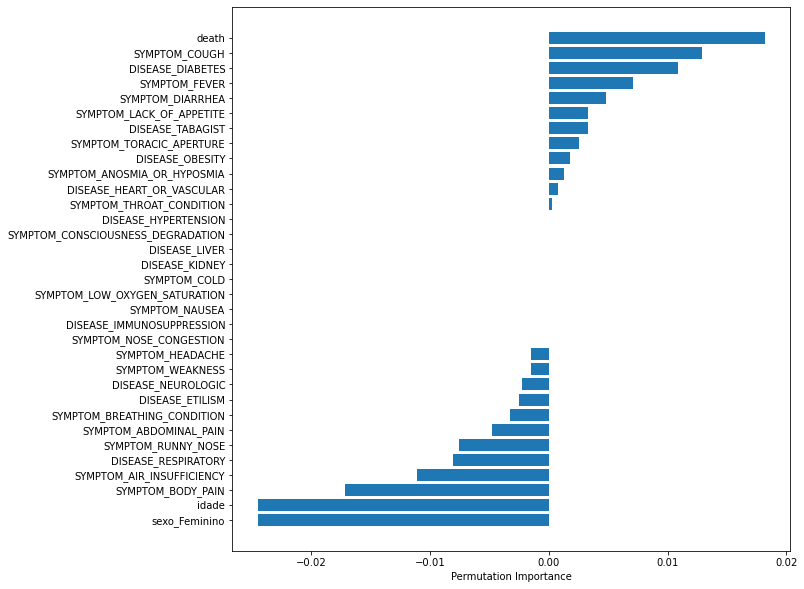

In [73]:
perm_importance = permutation_importance(final_cl_17, X_test_17, y_test_17)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")


### Teste com o Período 18 (20/07/2021 até 17/10/2021):

In [9]:
#Periodo 18
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=510)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=600)

df_18 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_18 = df_18.reset_index()
df_18 = df_18.drop("index", axis=1)
df_18

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0.608696,0,1,2021-07-20
1,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0.504348,1,0,2021-07-20
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.504348,1,0,2021-07-20
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.600000,1,0,2021-07-20
4,1,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0.521739,1,0,2021-07-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2021-10-17
1754,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.704348,0,1,2021-10-17
1755,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.704348,0,1,2021-10-17
1756,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.591304,0,1,2021-10-17


In [10]:
X_train_oversampled_18, y_train_oversampled_18, X_test_18, y_test_18, mean_test_scores_18, std_test_scores_18, best_scores_18, best_params_18 = apply_model_svc(df_18)

########################################

best_score: 0.8481959452657529
best_params_: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [11]:
preds_18, final_cl_18 = create_final_cl(X_train_oversampled_18, y_train_oversampled_18, X_test_18, y_test_18, 10, 0.1, 'rbf')

accuracy_score: 0.6023255813953489
########################################
"""Métricas f1_score:"""
f1:  0.48024316109422494
Macro:  0.57910463139457
Micro:  0.6023255813953489
weighted:  0.6248568002079857
########################################
"""Métricas precision_score:"""
Precision:  0.3700234192037471
Macro:  0.6007160975926357
Micro:  0.6023255813953489
weighted:  0.7074785231726098


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


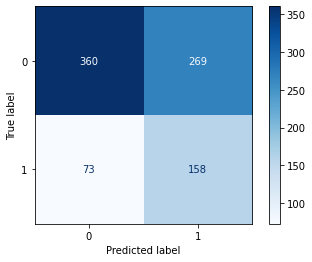

              precision    recall  f1-score   support

           0       0.83      0.57      0.68       629
           1       0.37      0.68      0.48       231

    accuracy                           0.60       860
   macro avg       0.60      0.63      0.58       860
weighted avg       0.71      0.60      0.62       860

roc_auc_score:  0.6281598634539811


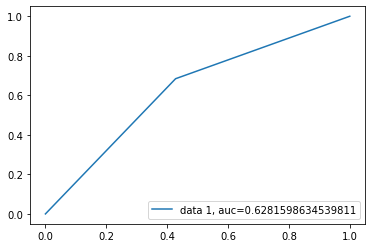

In [12]:
plot_conf_matrix (X_test_18, y_test_18, preds_18, final_cl_18)

plot_roc_curve(y_test_18, preds_18)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.08640
Feature: 1, Score: 0.00076
Feature: 2, Score: 0.01057
Feature: 3, Score: 0.02759
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00363
Feature: 6, Score: 0.00040
Feature: 7, Score: 0.02226
Feature: 8, Score: 0.00851
Feature: 9, Score: 0.01024
Feature: 10, Score: 0.00551
Feature: 11, Score: 0.03003
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01687
Feature: 14, Score: -0.00014
Feature: 15, Score: 0.00070
Feature: 16, Score: 0.00143
Feature: 17, Score: 0.00387
Feature: 18, Score: 0.00362
Feature: 19, Score: 0.00386
Feature: 20, Score: 0.03721
Feature: 21, Score: 0.02801
Feature: 22, Score: 0.00542
Feature: 23, Score: 0.03365
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01324
Feature: 27, Score: 0.00495
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01129
Feature: 30, Score: 0.05710
Feature: 31, Score: 0.00371
Feature: 32, Score: 0.00371


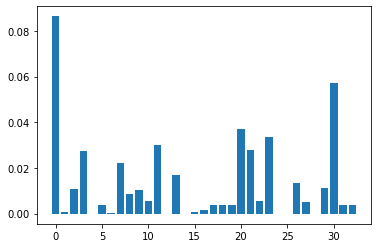

In [207]:
# perform permutation importance
results = permutation_importance(final_cl_18, X_train_oversampled_18, y_train_oversampled_18, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.09693
Feature: 1, Score: 0.00137
Feature: 2, Score: 0.01380
Feature: 3, Score: 0.04463
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00384
Feature: 6, Score: 0.00024
Feature: 7, Score: 0.01707
Feature: 8, Score: 0.01186
Feature: 9, Score: 0.00855
Feature: 10, Score: 0.00168
Feature: 11, Score: 0.01693
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01460
Feature: 14, Score: -0.00051
Feature: 15, Score: 0.00142
Feature: 16, Score: 0.00132
Feature: 17, Score: 0.00351
Feature: 18, Score: 0.00380
Feature: 19, Score: 0.00394
Feature: 20, Score: 0.04028
Feature: 21, Score: 0.02742
Feature: 22, Score: 0.00367
Feature: 23, Score: 0.02815
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01355
Feature: 27, Score: 0.00220
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00701
Feature: 30, Score: 0.04270
Feature: 31, Score: 0.00221
Feature: 32, Score: 0.00221


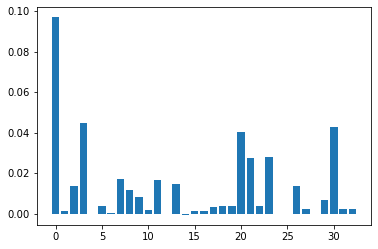

In [67]:
# perform permutation importance
results = permutation_importance(final_cl_18, X_train_oversampled_18, y_train_oversampled_18, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

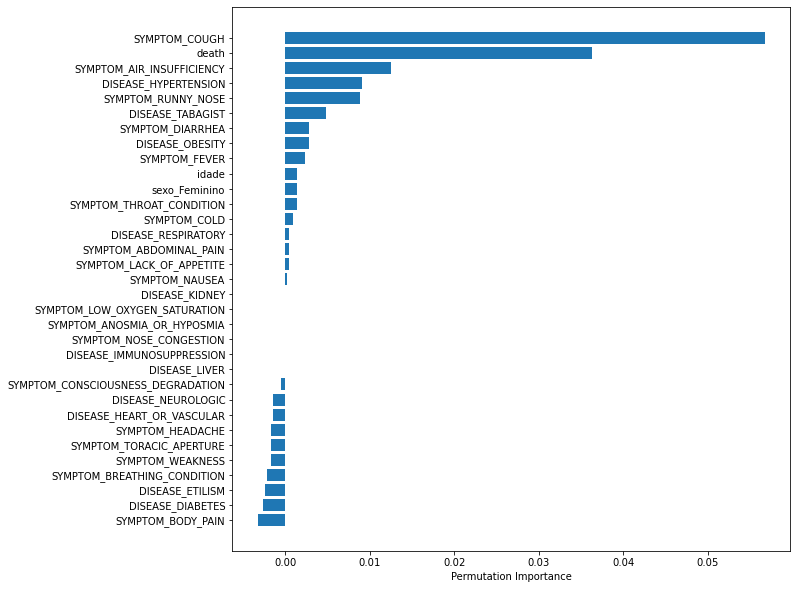

In [116]:
perm_importance = permutation_importance(final_cl_18, X_test_18, y_test_18)

feature_names = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION',
'SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION',
'SYMPTOM_WEAKNESS','SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE','SYMPTOM_ABDOMINAL_PAIN',
'SYMPTOM_CONSCIOUSNESS_DEGRADATION','DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES', 'DISEASE_HYPERTENSION','DISEASE_RESPIRATORY',
'DISEASE_OBESITY','DISEASE_KIDNEY','DISEASE_IMMUNOSUPPRESSION','DISEASE_TABAGIST','DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC',
'death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 19 (19/08/2021 até 16/11/2021):

In [17]:
#Periodo 19
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=540)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=630)

df_19 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_19 = df_19.reset_index()
df_19 = df_19.drop("index", axis=1)
df_19

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0.582609,0,1,2021-08-19
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.634783,1,0,2021-08-19
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.739130,1,0,2021-08-19
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.008696,1,0,2021-08-19
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.373913,0,1,2021-08-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0.182609,0,1,2021-11-16
1609,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.695652,1,0,2021-11-16
1610,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0.486957,1,0,2021-11-16
1611,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.478261,0,1,2021-11-16


In [18]:
X_train_oversampled_19, y_train_oversampled_19, X_test_19, y_test_19, mean_test_scores_19, std_test_scores_19, best_scores_19, best_params_19 = apply_model_svc(df_19)

########################################

best_score: 0.819415283203125
best_params_: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [19]:
preds_19, final_cl_19 = create_final_cl(X_train_oversampled_19, y_train_oversampled_19, X_test_19, y_test_19, 100, 0.1, 'rbf')

accuracy_score: 0.5913528591352859
########################################
"""Métricas f1_score:"""
f1:  0.3588621444201312
Macro:  0.5294822492827371
Micro:  0.5913528591352859
weighted:  0.6234779834818017
########################################
"""Métricas precision_score:"""
Precision:  0.27702702702702703
Macro:  0.5446892854850099
Micro:  0.5913528591352859
weighted:  0.692146178219882


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


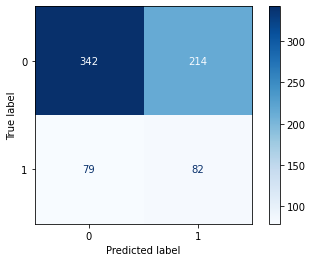

              precision    recall  f1-score   support

           0       0.81      0.62      0.70       556
           1       0.28      0.51      0.36       161

    accuracy                           0.59       717
   macro avg       0.54      0.56      0.53       717
weighted avg       0.69      0.59      0.62       717

roc_auc_score:  0.5622123419277


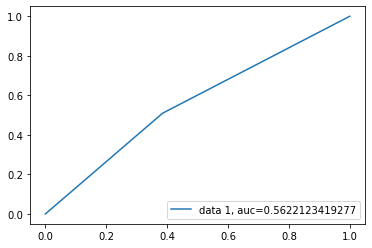

In [20]:
plot_conf_matrix (X_test_19, y_test_19, preds_19, final_cl_19)

plot_roc_curve(y_test_19, preds_19)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.09410
Feature: 1, Score: 0.00018
Feature: 2, Score: 0.04966
Feature: 3, Score: 0.04223
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00555
Feature: 6, Score: 0.00566
Feature: 7, Score: 0.01897
Feature: 8, Score: 0.03254
Feature: 9, Score: 0.03743
Feature: 10, Score: 0.01887
Feature: 11, Score: 0.03122
Feature: 12, Score: 0.00018
Feature: 13, Score: 0.04834
Feature: 14, Score: 0.00065
Feature: 15, Score: 0.00086
Feature: 16, Score: 0.00621
Feature: 17, Score: 0.01972
Feature: 18, Score: 0.01632
Feature: 19, Score: 0.00407
Feature: 20, Score: 0.07493
Feature: 21, Score: 0.07709
Feature: 22, Score: 0.02075
Feature: 23, Score: 0.04462
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02837
Feature: 27, Score: 0.00347
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01012
Feature: 30, Score: 0.06004
Feature: 31, Score: 0.02249
Feature: 32, Score: 0.02249


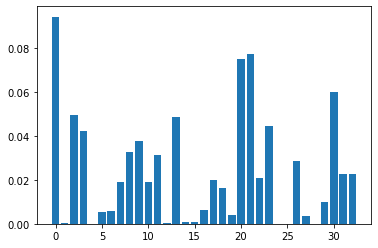

In [208]:
# perform permutation importance
results = permutation_importance(final_cl_19, X_train_oversampled_19, y_train_oversampled_19, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.06544
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.04267
Feature: 3, Score: 0.02342
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00504
Feature: 6, Score: 0.00263
Feature: 7, Score: 0.01097
Feature: 8, Score: 0.02098
Feature: 9, Score: 0.02294
Feature: 10, Score: 0.01150
Feature: 11, Score: 0.01302
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02276
Feature: 14, Score: 0.00094
Feature: 15, Score: 0.00100
Feature: 16, Score: 0.00423
Feature: 17, Score: 0.01164
Feature: 18, Score: 0.00495
Feature: 19, Score: 0.00082
Feature: 20, Score: 0.03903
Feature: 21, Score: 0.05743
Feature: 22, Score: 0.01378
Feature: 23, Score: 0.01766
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02431
Feature: 27, Score: 0.00414
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00996
Feature: 30, Score: 0.05237
Feature: 31, Score: 0.02375
Feature: 32, Score: 0.02375


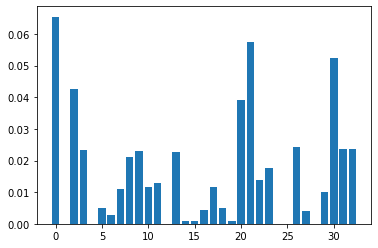

In [66]:
# perform permutation importance
results = permutation_importance(final_cl_19, X_train_oversampled_19, y_train_oversampled_19, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

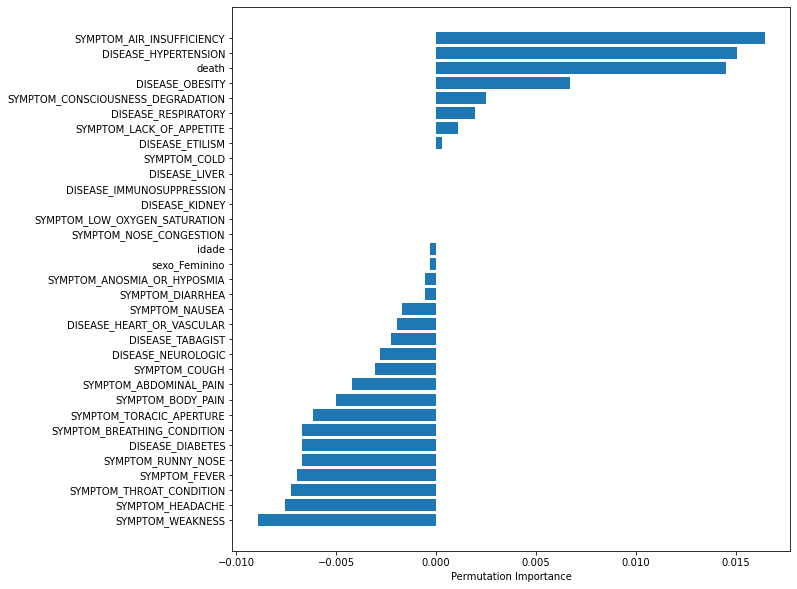

In [117]:
perm_importance = permutation_importance(final_cl_19, X_test_19, y_test_19)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 20 (18/09/2021 até 16/12/2021):

In [22]:
#Periodo 20
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=570)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=660)

df_20 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_20 = df_20.reset_index()
df_20 = df_20.drop("index", axis=1)
df_20

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.591304,1,0,2021-09-18
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.043478,1,0,2021-09-18
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.121739,0,1,2021-09-18
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.565217,0,1,2021-09-18
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,1,0,2021-09-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.408696,1,0,2021-12-16
1570,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.434783,1,0,2021-12-16
1571,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.773913,1,0,2021-12-16
1572,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.747826,1,0,2021-12-16


In [23]:
X_train_oversampled_20, y_train_oversampled_20, X_test_20, y_test_20, mean_test_scores_20, std_test_scores_20, best_scores_20, best_params_20 = apply_model_svc(df_20)

########################################

best_score: 0.8153189303242971
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [24]:
preds_20, final_cl_20 = create_final_cl(X_train_oversampled_20, y_train_oversampled_20, X_test_20, y_test_20, 100, 1, 'rbf')

accuracy_score: 0.6019553072625698
########################################
"""Métricas f1_score:"""
f1:  0.30656934306569344
Macro:  0.5137156215818183
Micro:  0.6019553072625698
weighted:  0.6346473875311761
########################################
"""Métricas precision_score:"""
Precision:  0.24045801526717558
Macro:  0.5255153512459225
Micro:  0.6019553072625698
weighted:  0.6919315054904983


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


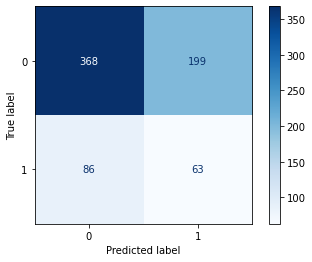

              precision    recall  f1-score   support

           0       0.81      0.65      0.72       567
           1       0.24      0.42      0.31       149

    accuracy                           0.60       716
   macro avg       0.53      0.54      0.51       716
weighted avg       0.69      0.60      0.63       716

roc_auc_score:  0.5359243871548122


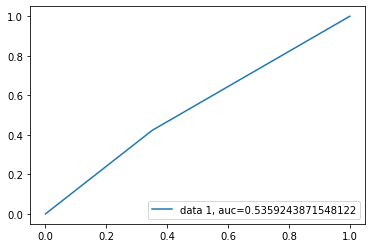

In [25]:
plot_conf_matrix (X_test_20, y_test_20, preds_20, final_cl_20)

plot_roc_curve(y_test_20, preds_20)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.13336
Feature: 1, Score: 0.00127
Feature: 2, Score: 0.07417
Feature: 3, Score: 0.13168
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01023
Feature: 6, Score: 0.00240
Feature: 7, Score: 0.02809
Feature: 8, Score: 0.03327
Feature: 9, Score: 0.05816
Feature: 10, Score: 0.03256
Feature: 11, Score: 0.04520
Feature: 12, Score: 0.00033
Feature: 13, Score: 0.04237
Feature: 14, Score: 0.00213
Feature: 15, Score: 0.00122
Feature: 16, Score: 0.01442
Feature: 17, Score: 0.02363
Feature: 18, Score: 0.02087
Feature: 19, Score: 0.01334
Feature: 20, Score: 0.10586
Feature: 21, Score: 0.11622
Feature: 22, Score: 0.02889
Feature: 23, Score: 0.05189
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.04651
Feature: 27, Score: 0.01247
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.02096
Feature: 30, Score: 0.13762
Feature: 31, Score: 0.13287
Feature: 32, Score: 0.13287


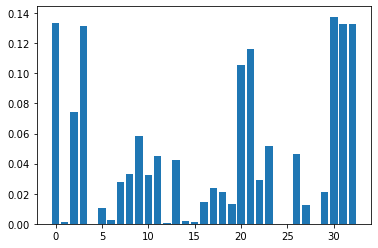

In [209]:
# perform permutation importance
results = permutation_importance(final_cl_20, X_train_oversampled_20, y_train_oversampled_20, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.05638
Feature: 1, Score: 0.00134
Feature: 2, Score: 0.05318
Feature: 3, Score: 0.04391
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00279
Feature: 6, Score: 0.00039
Feature: 7, Score: 0.01473
Feature: 8, Score: 0.01026
Feature: 9, Score: 0.02188
Feature: 10, Score: 0.01421
Feature: 11, Score: 0.02336
Feature: 12, Score: -0.00038
Feature: 13, Score: 0.02136
Feature: 14, Score: 0.00204
Feature: 15, Score: 0.00036
Feature: 16, Score: 0.00603
Feature: 17, Score: 0.00940
Feature: 18, Score: 0.01121
Feature: 19, Score: 0.00350
Feature: 20, Score: 0.05601
Feature: 21, Score: 0.05835
Feature: 22, Score: 0.01499
Feature: 23, Score: 0.02341
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02659
Feature: 27, Score: 0.00707
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01347
Feature: 30, Score: 0.11677
Feature: 31, Score: 0.03101
Feature: 32, Score: 0.03101


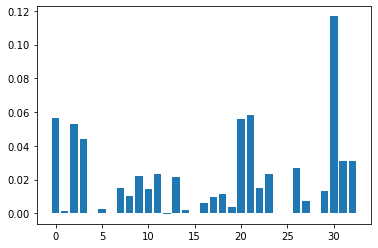

In [65]:
# perform permutation importance
results = permutation_importance(final_cl_20, X_train_oversampled_20, y_train_oversampled_20, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

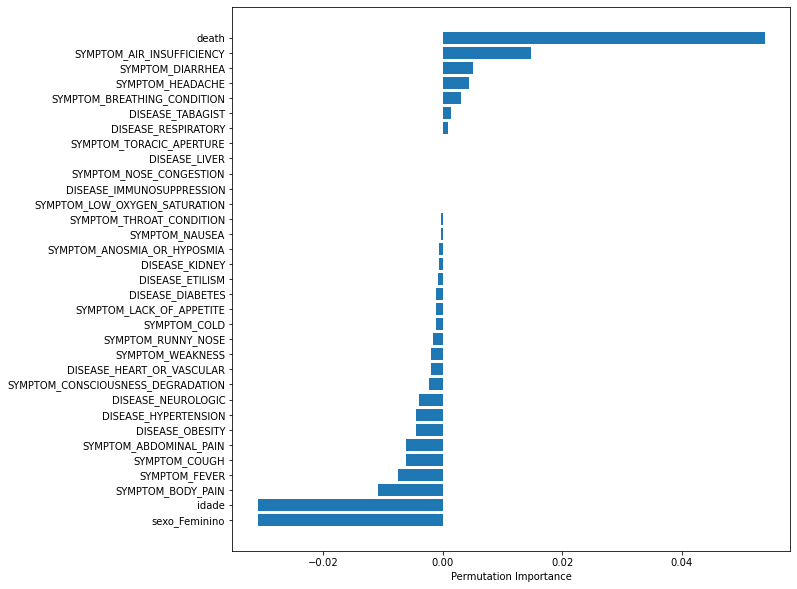

In [118]:
perm_importance = permutation_importance(final_cl_20, X_test_20, y_test_20)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 21 (18/10/2021 até 15/01/2022):

In [27]:
#Periodo 21
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=600)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=690)

df_21 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_21 = df_21.reset_index()
df_21 = df_21.drop("index", axis=1)
df_21

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.008696,0,1,2021-10-18
1,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0.791304,1,0,2021-10-18
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.313043,0,1,2021-10-18
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.739130,1,0,2021-10-18
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.521739,0,1,2021-10-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0.382609,0,1,2022-01-15
2235,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.695652,0,1,2022-01-15
2236,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0.304348,0,1,2022-01-15
2237,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0.643478,0,1,2022-01-15


In [28]:
X_train_oversampled_21, y_train_oversampled_21, X_test_21, y_test_21, mean_test_scores_21, std_test_scores_21, best_scores_21, best_params_21 = apply_model_svc(df_21)

########################################

best_score: 0.8740593132154008
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [29]:
preds_21, final_cl_21 = create_final_cl(X_train_oversampled_21, y_train_oversampled_21, X_test_21, y_test_21, 100, 1, 'rbf')

accuracy_score: 0.5961670088980151
########################################
"""Métricas f1_score:"""
f1:  0.3107476635514018
Macro:  0.5125858356479178
Micro:  0.5961670088980151
weighted:  0.6202052306261422
########################################
"""Métricas precision_score:"""
Precision:  0.258252427184466
Macro:  0.5191896385393788
Micro:  0.5961670088980151
weighted:  0.6583204309045241


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


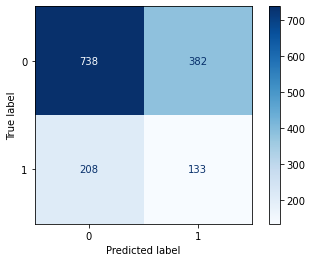

              precision    recall  f1-score   support

           0       0.78      0.66      0.71      1120
           1       0.26      0.39      0.31       341

    accuracy                           0.60      1461
   macro avg       0.52      0.52      0.51      1461
weighted avg       0.66      0.60      0.62      1461

roc_auc_score:  0.5244789484708839


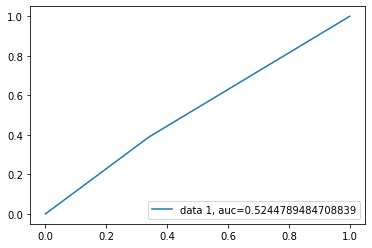

In [30]:
plot_conf_matrix (X_test_21, y_test_21, preds_21, final_cl_21)

plot_roc_curve(y_test_21, preds_21)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.16050
Feature: 1, Score: 0.00414
Feature: 2, Score: 0.08796
Feature: 3, Score: 0.16575
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00448
Feature: 6, Score: 0.00767
Feature: 7, Score: 0.02462
Feature: 8, Score: 0.02480
Feature: 9, Score: 0.03501
Feature: 10, Score: 0.04642
Feature: 11, Score: 0.04238
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.05027
Feature: 14, Score: 0.00054
Feature: 15, Score: 0.00712
Feature: 16, Score: 0.01664
Feature: 17, Score: 0.02023
Feature: 18, Score: 0.01719
Feature: 19, Score: 0.00682
Feature: 20, Score: 0.12054
Feature: 21, Score: 0.09335
Feature: 22, Score: 0.01938
Feature: 23, Score: 0.04737
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.06961
Feature: 27, Score: 0.01290
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.02395
Feature: 30, Score: 0.13194
Feature: 31, Score: 0.12860
Feature: 32, Score: 0.12860


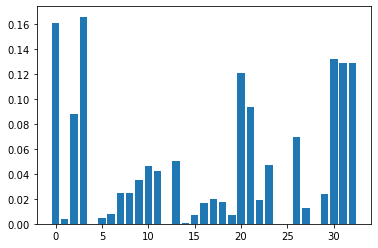

In [210]:
# perform permutation importance
results = permutation_importance(final_cl_21, X_train_oversampled_21, y_train_oversampled_21, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.06553
Feature: 1, Score: 0.00178
Feature: 2, Score: 0.05954
Feature: 3, Score: 0.07209
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00173
Feature: 6, Score: 0.00132
Feature: 7, Score: 0.00700
Feature: 8, Score: 0.00821
Feature: 9, Score: 0.01416
Feature: 10, Score: 0.01672
Feature: 11, Score: 0.01851
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01874
Feature: 14, Score: -0.00009
Feature: 15, Score: 0.00214
Feature: 16, Score: 0.00630
Feature: 17, Score: 0.00713
Feature: 18, Score: 0.01038
Feature: 19, Score: 0.00147
Feature: 20, Score: 0.07427
Feature: 21, Score: 0.04075
Feature: 22, Score: 0.00704
Feature: 23, Score: 0.01519
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02674
Feature: 27, Score: 0.00781
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01337
Feature: 30, Score: 0.10866
Feature: 31, Score: 0.00886
Feature: 32, Score: 0.00886


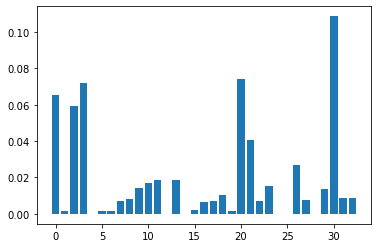

In [64]:
# perform permutation importance
results = permutation_importance(final_cl_21, X_train_oversampled_21, y_train_oversampled_21, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

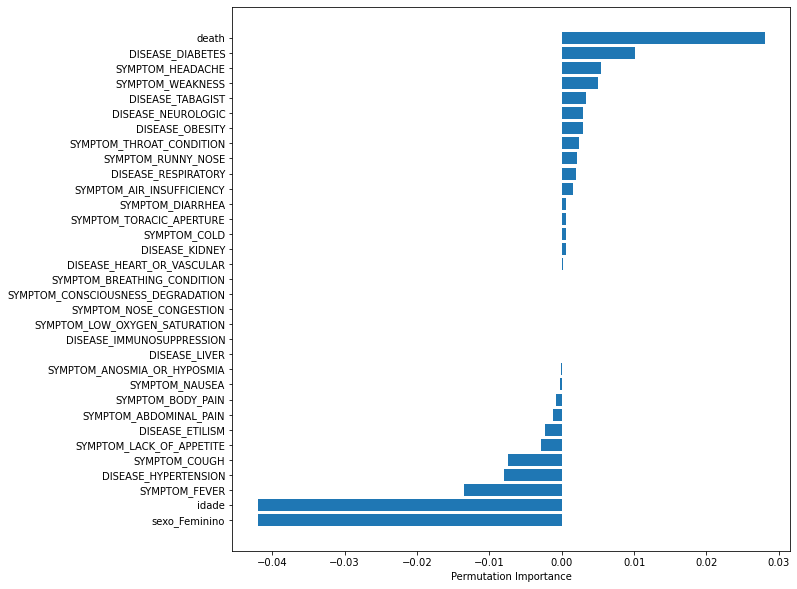

In [119]:
perm_importance = permutation_importance(final_cl_21, X_test_21, y_test_21)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 22 (17/11/2021 até 14/02/2022):

In [32]:
#Periodo 22
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=630)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=720)

df_22 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_22 = df_22.reset_index()
df_22 = df_22.drop("index", axis=1)
df_22

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.617391,1,0,2021-11-17
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.521739,1,0,2021-11-17
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.556522,1,0,2021-11-17
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.695652,1,0,2021-11-17
4,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0.626087,0,1,2021-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0.678261,1,0,2022-02-14
2781,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.626087,1,0,2022-02-14
2782,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.556522,1,0,2022-02-14
2783,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.539130,1,0,2022-02-14


In [33]:
X_train_oversampled_22, y_train_oversampled_22, X_test_22, y_test_22, mean_test_scores_22, std_test_scores_22, best_scores_22, best_params_22 = apply_model_svc(df_22)

########################################

best_score: 0.8120373337606154
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [34]:
preds_22, final_cl_22 = create_final_cl(X_train_oversampled_22, y_train_oversampled_22, X_test_22, y_test_22, 100, 1, 'rbf')

accuracy_score: 0.615648201027984
########################################
"""Métricas f1_score:"""
f1:  0.3097435897435898
Macro:  0.5217099428733778
Micro:  0.615648201027984
weighted:  0.6302957902505452
########################################
"""Métricas precision_score:"""
Precision:  0.2755474452554745
Macro:  0.5230605056701312
Micro:  0.615648201027984
weighted:  0.6498561739693587


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


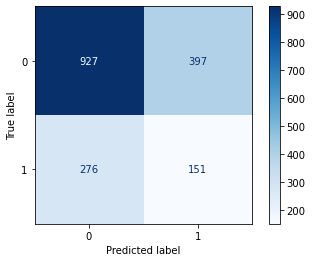

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1324
           1       0.28      0.35      0.31       427

    accuracy                           0.62      1751
   macro avg       0.52      0.53      0.52      1751
weighted avg       0.65      0.62      0.63      1751

roc_auc_score:  0.5268905169913045


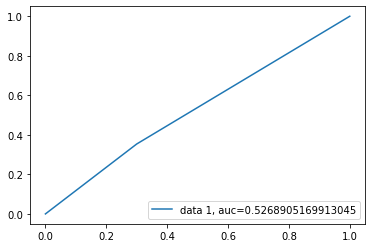

In [35]:
plot_conf_matrix (X_test_22, y_test_22, preds_22, final_cl_22)

plot_roc_curve(y_test_22, preds_22)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.11909
Feature: 1, Score: 0.00042
Feature: 2, Score: 0.06206
Feature: 3, Score: 0.12768
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00094
Feature: 6, Score: 0.00110
Feature: 7, Score: 0.02874
Feature: 8, Score: 0.01356
Feature: 9, Score: 0.02460
Feature: 10, Score: 0.02679
Feature: 11, Score: 0.04754
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.03376
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00209
Feature: 16, Score: 0.00558
Feature: 17, Score: 0.00681
Feature: 18, Score: 0.01277
Feature: 19, Score: 0.00562
Feature: 20, Score: 0.11125
Feature: 21, Score: 0.07959
Feature: 22, Score: 0.04552
Feature: 23, Score: 0.03648
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.05154
Feature: 27, Score: 0.00298
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.03083
Feature: 30, Score: 0.09420
Feature: 31, Score: 0.07173
Feature: 32, Score: 0.07173


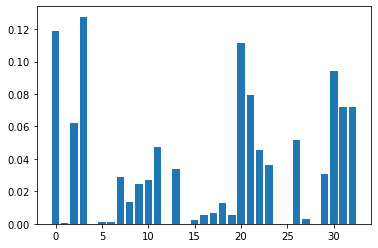

In [211]:
# perform permutation importance
results = permutation_importance(final_cl_22, X_train_oversampled_22, y_train_oversampled_22, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.07447
Feature: 1, Score: 0.00109
Feature: 2, Score: 0.02848
Feature: 3, Score: 0.08765
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00109
Feature: 6, Score: 0.00058
Feature: 7, Score: 0.01550
Feature: 8, Score: 0.00501
Feature: 9, Score: 0.01471
Feature: 10, Score: 0.01081
Feature: 11, Score: 0.01512
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01957
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00062
Feature: 16, Score: 0.00242
Feature: 17, Score: 0.00585
Feature: 18, Score: 0.00949
Feature: 19, Score: 0.00161
Feature: 20, Score: 0.06309
Feature: 21, Score: 0.02625
Feature: 22, Score: 0.02422
Feature: 23, Score: 0.02582
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02806
Feature: 27, Score: 0.00171
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01622
Feature: 30, Score: 0.06395
Feature: 31, Score: -0.01274
Feature: 32, Score: -0.01274


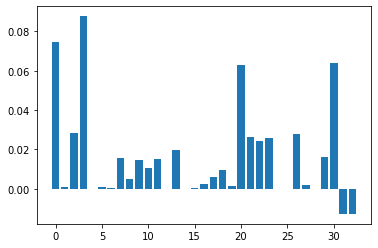

In [63]:
# perform permutation importance
results = permutation_importance(final_cl_22, X_train_oversampled_22, y_train_oversampled_22, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

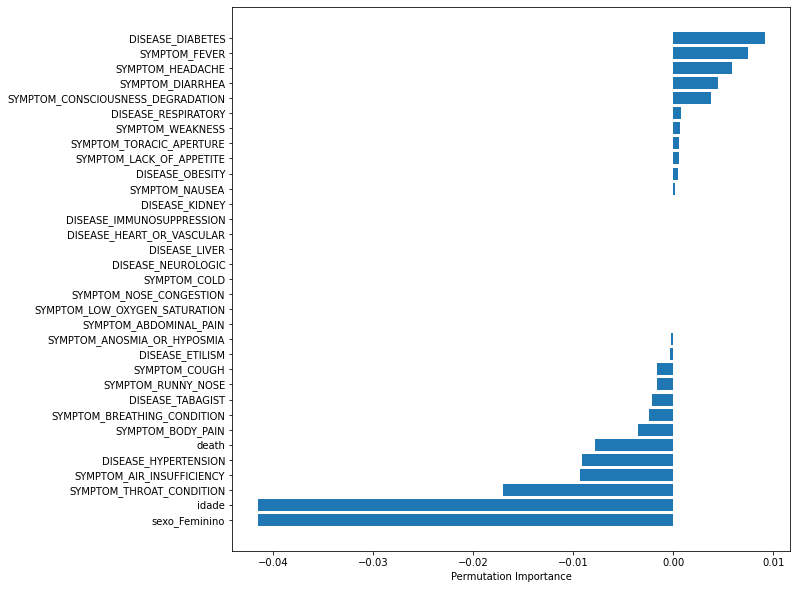

In [120]:
perm_importance = permutation_importance(final_cl_22, X_test_22, y_test_22)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 23 (17/12/2021 até 16/03/2022):

In [37]:
#Periodo 23
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=660)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=750)

df_23 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_23 = df_23.reset_index()
df_23 = df_23.drop("index", axis=1)
df_23

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0.330435,0,1,2021-12-17
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.800000,0,1,2021-12-17
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.295652,0,1,2021-12-17
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.643478,1,0,2021-12-17
4,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.365217,0,1,2021-12-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.504348,0,1,2022-03-16
2809,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.017391,0,1,2022-03-16
2810,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.643478,1,0,2022-03-16
2811,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2022-03-16


In [38]:
X_train_oversampled_23, y_train_oversampled_23, X_test_23, y_test_23, mean_test_scores_23, std_test_scores_23, best_scores_23, best_params_23 = apply_model_svc(df_23)

########################################

best_score: 0.7783206350897758
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [39]:
preds_23, final_cl_23 = create_final_cl(X_train_oversampled_23, y_train_oversampled_23, X_test_23, y_test_23, 100, 1, 'rbf')

accuracy_score: 0.5907297830374754
########################################
"""Métricas f1_score:"""
f1:  0.366412213740458
Macro:  0.532077192085087
Micro:  0.5907297830374754
weighted:  0.5954677360670554
########################################
"""Métricas precision_score:"""
Precision:  0.3508771929824561
Macro:  0.5318374060150376
Micro:  0.5907297830374754
weighted:  0.6010805644535402


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


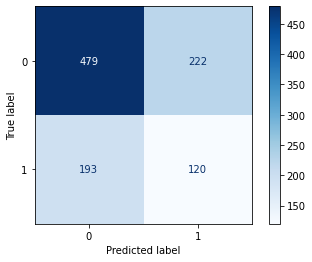

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       701
           1       0.35      0.38      0.37       313

    accuracy                           0.59      1014
   macro avg       0.53      0.53      0.53      1014
weighted avg       0.60      0.59      0.60      1014

roc_auc_score:  0.5333480696221282


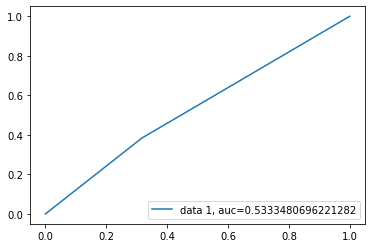

In [40]:
plot_conf_matrix (X_test_23, y_test_23, preds_23, final_cl_23)

plot_roc_curve(y_test_23, preds_23)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.10247
Feature: 1, Score: 0.00366
Feature: 2, Score: 0.06285
Feature: 3, Score: 0.12336
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00555
Feature: 6, Score: 0.00278
Feature: 7, Score: 0.04041
Feature: 8, Score: 0.03051
Feature: 9, Score: 0.03622
Feature: 10, Score: 0.02438
Feature: 11, Score: 0.05496
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.03201
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00249
Feature: 16, Score: 0.00752
Feature: 17, Score: 0.00822
Feature: 18, Score: 0.02200
Feature: 19, Score: 0.00823
Feature: 20, Score: 0.12261
Feature: 21, Score: 0.05920
Feature: 22, Score: 0.02984
Feature: 23, Score: 0.02521
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.03697
Feature: 27, Score: 0.01482
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.02986
Feature: 30, Score: 0.11344
Feature: 31, Score: 0.05723
Feature: 32, Score: 0.05723


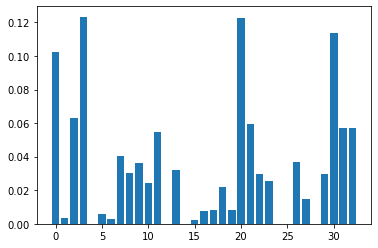

In [212]:
# perform permutation importance
results = permutation_importance(final_cl_23, X_train_oversampled_23, y_train_oversampled_23, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.07475
Feature: 1, Score: 0.00176
Feature: 2, Score: 0.03967
Feature: 3, Score: 0.08523
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00285
Feature: 6, Score: 0.00213
Feature: 7, Score: 0.02062
Feature: 8, Score: 0.01480
Feature: 9, Score: 0.01924
Feature: 10, Score: 0.01490
Feature: 11, Score: 0.02695
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01915
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.00127
Feature: 16, Score: 0.00409
Feature: 17, Score: 0.00500
Feature: 18, Score: 0.01353
Feature: 19, Score: 0.00396
Feature: 20, Score: 0.08238
Feature: 21, Score: 0.04614
Feature: 22, Score: 0.01736
Feature: 23, Score: 0.01655
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01814
Feature: 27, Score: 0.00870
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01854
Feature: 30, Score: 0.06712
Feature: 31, Score: 0.01007
Feature: 32, Score: 0.01007


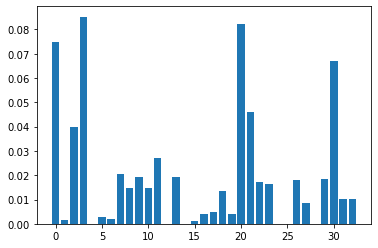

In [62]:
# perform permutation importance
results = permutation_importance(final_cl_23, X_train_oversampled_23, y_train_oversampled_23, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

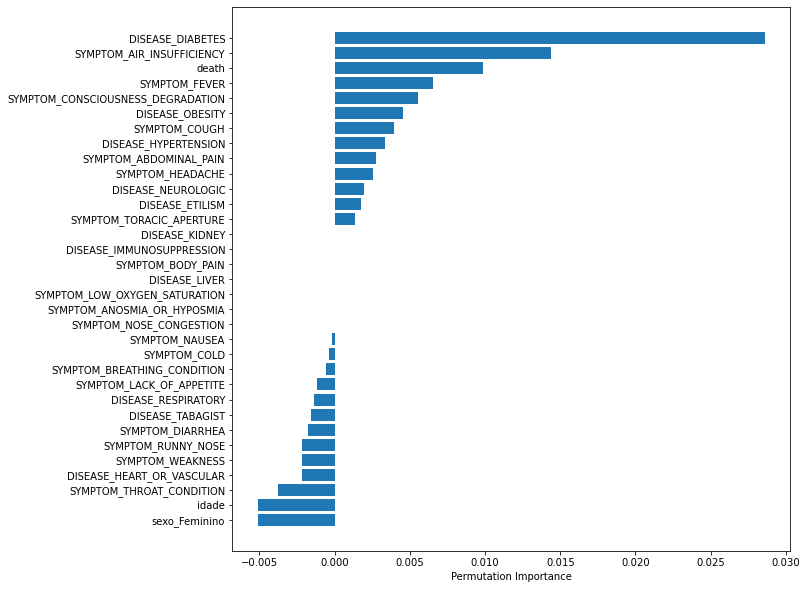

In [121]:
perm_importance = permutation_importance(final_cl_23, X_test_23, y_test_23)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 24 (16/01/2022 até 15/04/2022):

In [42]:
#Periodo 24
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=690)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=780)

df_24 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_24 = df_24.reset_index()
df_24 = df_24.drop("index", axis=1)
df_24

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.495652,0,1,2022-01-16
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,0,1,2022-01-16
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0.460870,1,0,2022-01-16
3,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.669565,1,0,2022-01-16
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.721739,0,1,2022-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.739130,1,0,2022-04-15
2068,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.530435,0,1,2022-04-15
2069,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0.695652,0,1,2022-04-15
2070,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.686957,1,0,2022-04-15


In [43]:
X_train_oversampled_24, y_train_oversampled_24, X_test_24, y_test_24, mean_test_scores_24, std_test_scores_24, best_scores_24, best_params_24 = apply_model_svc(df_24)

########################################

best_score: 0.7795855894881235
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [44]:
preds_24, final_cl_24 = create_final_cl(X_train_oversampled_24, y_train_oversampled_24, X_test_24, y_test_24, 100, 1, 'rbf')

accuracy_score: 0.6232073011734028
########################################
"""Métricas f1_score:"""
f1:  0.3991683991683992
Macro:  0.5623572290238957
Micro:  0.6232073011734028
weighted:  0.6017182896800455
########################################
"""Métricas precision_score:"""
Precision:  0.5052631578947369
Macro:  0.5836541092766578
Micro:  0.6232073011734028
weighted:  0.602561965868125


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


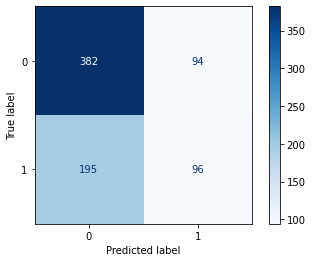

              precision    recall  f1-score   support

           0       0.66      0.80      0.73       476
           1       0.51      0.33      0.40       291

    accuracy                           0.62       767
   macro avg       0.58      0.57      0.56       767
weighted avg       0.60      0.62      0.60       767

roc_auc_score:  0.5662089578099281


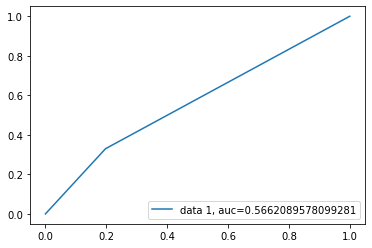

In [45]:
plot_conf_matrix (X_test_24, y_test_24, preds_24, final_cl_24)

plot_roc_curve(y_test_24, preds_24)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.11135
Feature: 1, Score: 0.00504
Feature: 2, Score: 0.09918
Feature: 3, Score: 0.12368
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00653
Feature: 6, Score: 0.00609
Feature: 7, Score: 0.05807
Feature: 8, Score: 0.03545
Feature: 9, Score: 0.04050
Feature: 10, Score: 0.03255
Feature: 11, Score: 0.06708
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02697
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00082
Feature: 16, Score: 0.00112
Feature: 17, Score: 0.01937
Feature: 18, Score: 0.01651
Feature: 19, Score: 0.01172
Feature: 20, Score: 0.10423
Feature: 21, Score: 0.05373
Feature: 22, Score: 0.01612
Feature: 23, Score: 0.02163
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.03390
Feature: 27, Score: 0.00870
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.03308
Feature: 30, Score: 0.09954
Feature: 31, Score: 0.11556
Feature: 32, Score: 0.11556


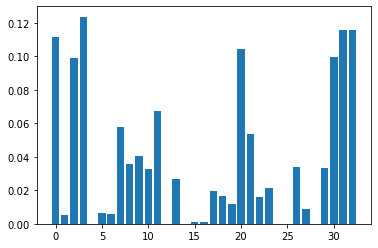

In [213]:
# perform permutation importance
results = permutation_importance(final_cl_24, X_train_oversampled_24, y_train_oversampled_24, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.07423
Feature: 1, Score: 0.00164
Feature: 2, Score: 0.05597
Feature: 3, Score: 0.08704
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00295
Feature: 6, Score: 0.00299
Feature: 7, Score: 0.02913
Feature: 8, Score: 0.01308
Feature: 9, Score: 0.02116
Feature: 10, Score: 0.02528
Feature: 11, Score: 0.03498
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01241
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00013
Feature: 16, Score: 0.00063
Feature: 17, Score: 0.01168
Feature: 18, Score: 0.00768
Feature: 19, Score: 0.00623
Feature: 20, Score: 0.08273
Feature: 21, Score: 0.04692
Feature: 22, Score: 0.00858
Feature: 23, Score: 0.01130
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01716
Feature: 27, Score: 0.00275
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01688
Feature: 30, Score: 0.07504
Feature: 31, Score: -0.00852
Feature: 32, Score: -0.00852


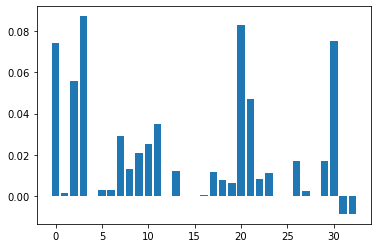

In [61]:
# perform permutation importance
results = permutation_importance(final_cl_24, X_train_oversampled_24, y_train_oversampled_24, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

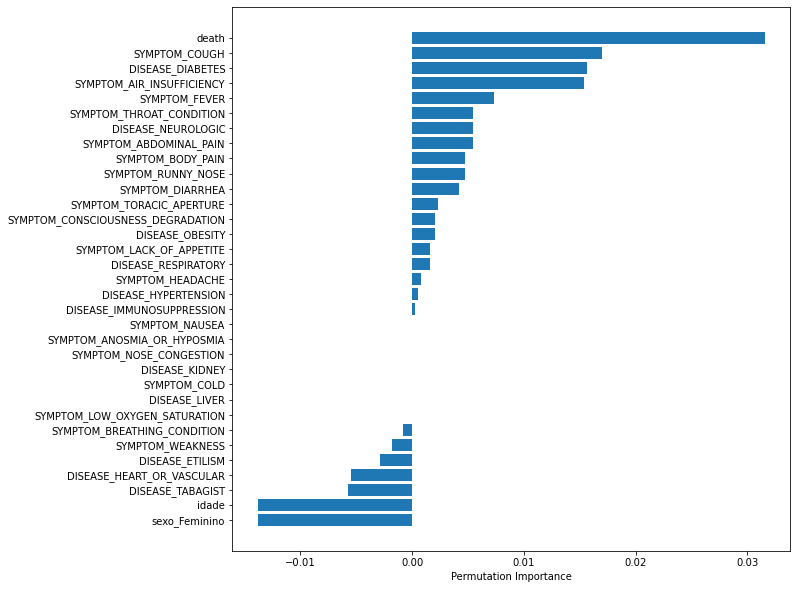

In [122]:
perm_importance = permutation_importance(final_cl_24, X_test_24, y_test_24)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 25 (15/02/2022 até 15/05/2021):

In [47]:
#Periodo 25
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=720)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=810)

df_25 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_25 = df_25.reset_index()
df_25 = df_25.drop("index", axis=1)
df_25

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.373913,1,0,2022-02-15
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.582609,0,1,2022-02-15
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.686957,0,1,2022-02-15
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.626087,0,1,2022-02-15
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.313043,0,1,2022-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.008696,1,0,2022-05-15
1479,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.043478,1,0,2022-05-15
1480,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.026087,1,0,2022-05-15
1481,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.356522,0,1,2022-05-15


In [48]:
X_train_oversampled_25, y_train_oversampled_25, X_test_25, y_test_25, mean_test_scores_25, std_test_scores_25, best_scores_25, best_params_25 = apply_model_svc(df_25)

########################################

best_score: 0.7741355382808784
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [49]:
preds_25, final_cl_25 = create_final_cl(X_train_oversampled_25, y_train_oversampled_25, X_test_25, y_test_25, 100, 1, 'rbf')

accuracy_score: 0.6855345911949685
########################################
"""Métricas f1_score:"""
f1:  0.5169082125603864
Macro:  0.6419039897300767
Micro:  0.6855345911949685
weighted:  0.6933959608282824
########################################
"""Métricas precision_score:"""
Precision:  0.4713656387665198
Macro:  0.6378833083808149
Micro:  0.6855345911949685
weighted:  0.7064802100143768


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


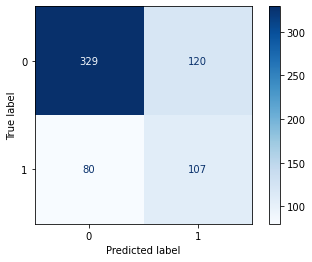

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       449
           1       0.47      0.57      0.52       187

    accuracy                           0.69       636
   macro avg       0.64      0.65      0.64       636
weighted avg       0.71      0.69      0.69       636

roc_auc_score:  0.652465967152198


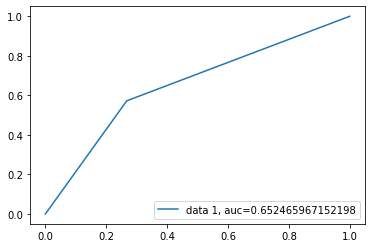

In [50]:
plot_conf_matrix (X_test_25, y_test_25, preds_25, final_cl_25)

plot_roc_curve(y_test_25, preds_25)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.10887
Feature: 1, Score: 0.00362
Feature: 2, Score: 0.08307
Feature: 3, Score: 0.11574
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00098
Feature: 7, Score: 0.04829
Feature: 8, Score: 0.01589
Feature: 9, Score: 0.01809
Feature: 10, Score: 0.03145
Feature: 11, Score: 0.03109
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01407
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00193
Feature: 17, Score: 0.00755
Feature: 18, Score: 0.01721
Feature: 19, Score: 0.00714
Feature: 20, Score: 0.09673
Feature: 21, Score: 0.03073
Feature: 22, Score: 0.01517
Feature: 23, Score: 0.03189
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02014
Feature: 27, Score: 0.01130
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00990
Feature: 30, Score: 0.13968
Feature: 31, Score: 0.02535
Feature: 32, Score: 0.02535


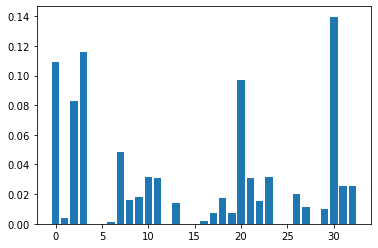

In [214]:
# perform permutation importance
results = permutation_importance(final_cl_25, X_train_oversampled_25, y_train_oversampled_25, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.10225
Feature: 1, Score: 0.00077
Feature: 2, Score: 0.07960
Feature: 3, Score: 0.08623
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00005
Feature: 6, Score: 0.00170
Feature: 7, Score: 0.05471
Feature: 8, Score: 0.01020
Feature: 9, Score: 0.02284
Feature: 10, Score: 0.02844
Feature: 11, Score: 0.01735
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01229
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00198
Feature: 17, Score: 0.00582
Feature: 18, Score: 0.01554
Feature: 19, Score: 0.00291
Feature: 20, Score: 0.08227
Feature: 21, Score: 0.02651
Feature: 22, Score: 0.00839
Feature: 23, Score: 0.02134
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01767
Feature: 27, Score: 0.00777
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01347
Feature: 30, Score: 0.14182
Feature: 31, Score: 0.03080
Feature: 32, Score: 0.03080


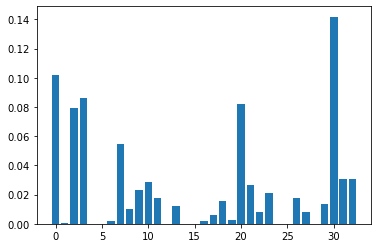

In [60]:
# perform permutation importance
results = permutation_importance(final_cl_25, X_train_oversampled_25, y_train_oversampled_25, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# perform permutation importance
results = permutation_importance(final_cl_24, X_train_oversampled_24, y_train_oversampled_2, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

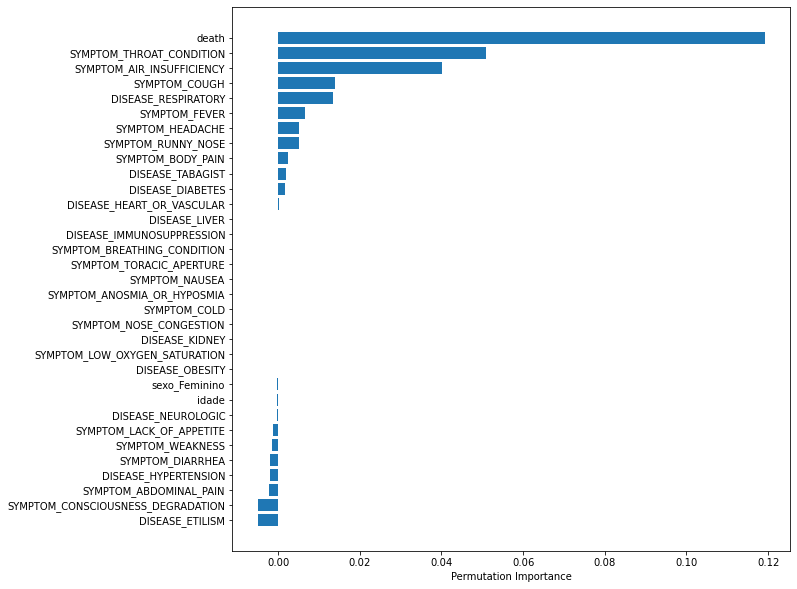

In [123]:
perm_importance = permutation_importance(final_cl_25, X_test_25, y_test_25)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 26 (17/03/2022 até 13/06/2022):

In [52]:
#Periodo 26
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=750)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=840)

df_26 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_26 = df_26.reset_index()
df_26 = df_26.drop("index", axis=1)
df_26

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0.582609,0,1,2022-03-17
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.513043,0,1,2022-03-17
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0.678261,1,0,2022-03-17
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.530435,1,0,2022-03-17
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.426087,0,1,2022-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2022-06-12
1391,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.556522,0,1,2022-06-12
1392,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,1,0,2022-06-12
1393,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2022-06-13


In [53]:
X_train_oversampled_26, y_train_oversampled_26, X_test_26, y_test_26, mean_test_scores_26, std_test_scores_26, best_scores_26, best_params_26 = apply_model_svc(df_26)

########################################

best_score: 0.8241000635380871
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [54]:
preds_26, final_cl_26 = create_final_cl(X_train_oversampled_26, y_train_oversampled_26, X_test_26, y_test_26, 100, 1, 'rbf')

accuracy_score: 0.7282958199356914
########################################
"""Métricas f1_score:"""
f1:  0.3045267489711934
Macro:  0.5678477900700123
Micro:  0.7282958199356914
weighted:  0.7786739612391632
########################################
"""Métricas precision_score:"""
Precision:  0.20441988950276244
Macro:  0.5738652735495672
Micro:  0.7282958199356914
weighted:  0.8696591662429897


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


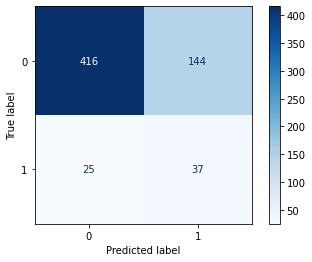

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       560
           1       0.20      0.60      0.30        62

    accuracy                           0.73       622
   macro avg       0.57      0.67      0.57       622
weighted avg       0.87      0.73      0.78       622

roc_auc_score:  0.669815668202765


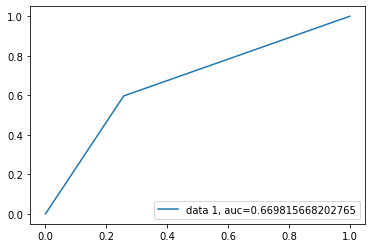

In [55]:
plot_conf_matrix (X_test_26, y_test_26, preds_26, final_cl_26)

plot_roc_curve(y_test_26, preds_26)

### Determinação dos atributos mais importantes:

Feature: 0, Score: 0.07030
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.06541
Feature: 3, Score: 0.10596
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.06388
Feature: 8, Score: 0.01745
Feature: 9, Score: 0.01437
Feature: 10, Score: 0.01877
Feature: 11, Score: 0.03557
Feature: 12, Score: -0.00021
Feature: 13, Score: 0.00488
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00172
Feature: 17, Score: 0.00319
Feature: 18, Score: 0.00998
Feature: 19, Score: 0.00453
Feature: 20, Score: 0.06912
Feature: 21, Score: 0.03255
Feature: 22, Score: 0.01600
Feature: 23, Score: 0.02274
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02338
Feature: 27, Score: 0.01195
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00889
Feature: 30, Score: 0.16910
Feature: 31, Score: 0.03165
Feature: 32, Score: 0.03165


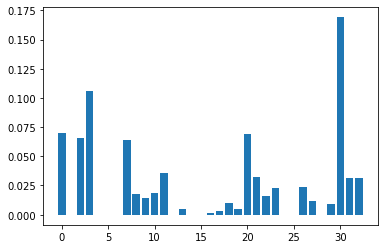

In [215]:
# perform permutation importance
results = permutation_importance(final_cl_26, X_train_oversampled_26, y_train_oversampled_26, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.05037
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.06344
Feature: 3, Score: 0.08343
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00031
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.07391
Feature: 8, Score: 0.01500
Feature: 9, Score: 0.01067
Feature: 10, Score: 0.00895
Feature: 11, Score: 0.02081
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00443
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00089
Feature: 17, Score: 0.00450
Feature: 18, Score: 0.00809
Feature: 19, Score: 0.00216
Feature: 20, Score: 0.06704
Feature: 21, Score: 0.03042
Feature: 22, Score: 0.01408
Feature: 23, Score: 0.02135
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01908
Feature: 27, Score: 0.00587
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01274
Feature: 30, Score: 0.16036
Feature: 31, Score: 0.02031
Feature: 32, Score: 0.02031


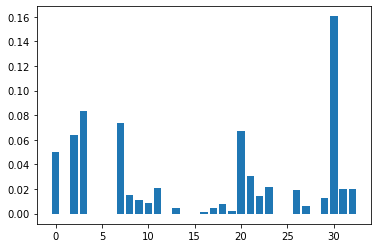

In [59]:
# perform permutation importance
results = permutation_importance(final_cl_26, X_train_oversampled_26, y_train_oversampled_26, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

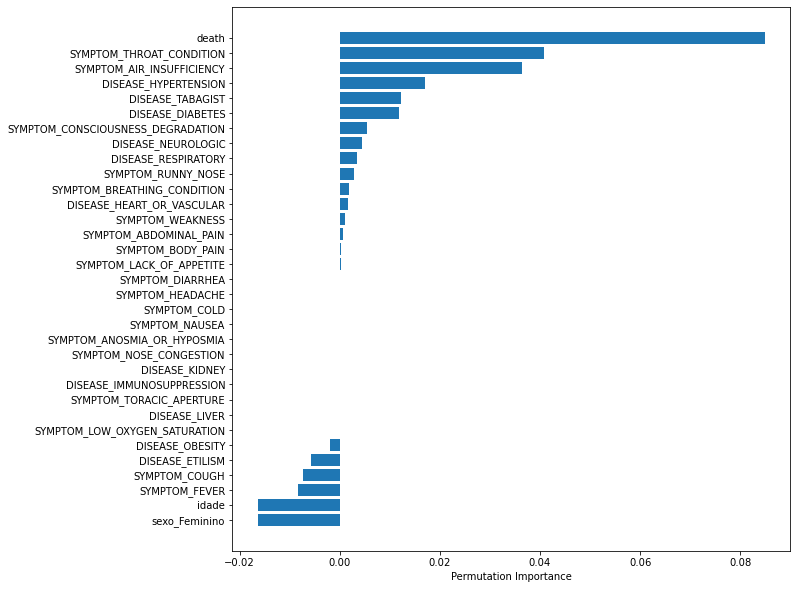

In [124]:
perm_importance = permutation_importance(final_cl_26, X_test_26, y_test_26)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

In [ ]:
def permutation_importance(final_cl, X_test, y_test):
    perm_importance = permutation_importance(final_cl, X_test, y_test)

    sorted_idx = perm_importance.importances_mean.argsort()
    plt.figure(figsize=(10,10))
    plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
    plt.xlabel("Permutation Importance")
    plt.show()